# 

<center>

# INTRODUCTION TO AI AND TEXT ANALYTICS - EMATM0067
# INTRODUCTION TO AI - COURSEWORK
</center>

## Overview of the Task:

- As a part of coursework, Downloaded the Penguins dataset (`penguin.csv`) from the [ematm0067](https://github.com/ematm0067/2023_24/blob/main/coursework/penguins.csv) repository. Also, knows as Palmer Penguins Data. 
- This dataset contains the information about three different penguins.
- This task includes exploration of the dataset, visualisations and developing predictive models to predict the type of penguins by using suitable AI-ML algorithms.

- My work: https://github.com/SudhaMsr/AI-Analytics

### To set up the environment for analysis, it is important to begin with Importing necessary libraries:
*Let's begin the coursework, by installing all the libraries needed:*
- libraries needed for pre-processing to prediction 

In [122]:
!pip install plotly
!pip install graphviz dtreeviz
!pip install umap-learn
!pip install scikit-learn

In [123]:
import warnings
warnings.filterwarnings('ignore')  # to ignore the warnings

import pandas as pd  # dataset loading
import numpy as np
import matplotlib.pyplot as plt  # visualisations
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             accuracy_score, classification_report, 
                             confusion_matrix, roc_curve, auc, silhouette_score,
                             silhouette_samples, adjusted_rand_score, 
                             adjusted_mutual_info_score, davies_bouldin_score, 
                             calinski_harabasz_score, pairwise_distances_argmin_min)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.datasets import make_classification

import random
import matplotlib.cm as cm

In [124]:
sns.__version__

'0.12.2'

### Loading Data
- Loading the penguins data into python environment using pandas dataframe.
- Using *head()* function to check the contents of the data

In [125]:
## loading dataset
data = pd.read_csv('penguins.csv')
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

# 1.  Brief Exploration of Data:
*Steps to understanding the data*
1. Data Preparation
2. Data preprocessing
3. Data Exploration (EDA)
4. Data Manipulations.. if needed
- The following steps gives an overview of size and shape of the data.

In [126]:
data.info() ## summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


- *info()* function provides the summary of dataset, including count of non-null values and type of data presented in each column i.e. int, float, etc..

In [127]:
data.shape  ## size and shape of the data # dimensions of the dataset (number of rows and columns).

(344, 9)

Dataset consisted of 344 rows and 9 columns
- Variables are saved in columns.
- Observations are saved in rows.

In [128]:
data.size ## 344 x 9

3096

In [129]:
data.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

## Data Preprocessing
- Check the null values before proceeding deeper exploration.
- If missing values found do the suitable imputation if needed.

In [130]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [131]:
data.isnull().sum() ## count of missing values in each column

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

It is always important to identify the missing values before doing any kind of analysis.
Because, missing data can effect the accuracy and model's performance.

- Identifying null values helps in checking the quality of data
- Handling the missing values with appropriate imputation methods, or dropping them.

From this data, only few missing values are there.which is less then 20. Missing values are present in 4 numerical and 1 catergorical columns. I think ignoring this data of missing values cannot affect analysis.

Decided to impute the missing values:

In [132]:
## Imputing numerical columns with mean
n_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data[n_columns] = data[n_columns].fillna(data[n_columns].mean())

### We have null values in 4th columns/ crosss cheching how it is imputed 

In [133]:
data.iloc[3:4] ## how it is..imputed

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3      4  Adelie  Torgersen        43.92193       17.15117         200.915205   

   body_mass_g  sex  year  
3  4201.754386  NaN  2007

In [134]:
#data.head()

In [135]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

Importing categorical values using *mode()* function imputes with the most frequent value present in the 'Sex' column.
This model is not acceptable if we need good performance model, especially if the data is not evenly distributed.

It is better to drop:

In [136]:
print(data['sex'].unique())

['male' 'female' nan]


In [137]:
data = data.dropna(subset=['sex'])

In [138]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [139]:
data.drop(columns=['rowid'], inplace=True)   ### lets drop rowid..its just aserial number

In [140]:
data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [141]:
data['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

## Data Exploration
- Understanding and exploring more about data
- To get more meaningful insights

In [142]:
data.shape ## shape changed after preprocessing

(333, 8)

In [143]:
data.count() ## count of values

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
year                 333
dtype: int64

In [144]:
data.describe(include='all') # statistical summary 

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

- *describe()* function gives the basic descriptive and statistical summary like mean, standard deviation etc.. for each column

In [145]:
data.describe().transpose()

count         mean         std     min     25%     50%  \
bill_length_mm     333.0    43.992793    5.468668    32.1    39.5    44.5   
bill_depth_mm      333.0    17.164865    1.969235    13.1    15.6    17.3   
flipper_length_mm  333.0   200.966967   14.015765   172.0   190.0   197.0   
body_mass_g        333.0  4207.057057  805.215802  2700.0  3550.0  4050.0   
year               333.0  2008.042042    0.812944  2007.0  2007.0  2008.0   

                      75%     max  
bill_length_mm       48.6    59.6  
bill_depth_mm        18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4775.0  6300.0  
year               2009.0  2009.0

In [146]:
data.describe(include=['O'])

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

In [147]:
data.nunique()  ##distinct values count in each column

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
year                   3
dtype: int64

In [148]:
pd.concat({"Unique values" : data.apply(pd.unique), "Num" : data.nunique()}, axis=1)

Unique values  Num
species                                  [Adelie, Gentoo, Chinstrap]    3
island                                    [Torgersen, Biscoe, Dream]    3
bill_length_mm     [39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41....  163
bill_depth_mm      [18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17....   79
flipper_length_mm  [181.0, 186.0, 195.0, 193.0, 190.0, 182.0, 191...   54
body_mass_g        [3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625....   93
sex                                                   [male, female]    2
year                                              [2007, 2008, 2009]    3

- There are three different species in three islands and they recorded the observesations for 3 years.

### Dataset consisted of the following information
#### The penguin dataset contains observations of penguins with the following attributes:

|variable          |class-type| description |
|:-----------------|:-------  |:----------- |
|species           |integer   | Penguin species (Adelie, Gentoo, Chinstrap) |
|island            |integer   | Island where recorded (Biscoe, Dream, Torgersen) |
|bill_length_mm    |double    | Bill length in millimeters (also known as culmen length) |
|bill_depth_mm     |double    | Bill depth in millimeters (also known as culmen depth) |
|flipper_length_mm |integer   | Flipper length in mm |
|body_mass_g       |integer   | Body mass in grams |
|sex               |integer   | sex of the animal |
|year              |integer   | year recorded |

- The main measurements are body mass, culmen (bill) length, bill depth, and flipper length.
- Recorded the observations between 2007 to 2009.

### Statistical Summary:
- This is the summary of all three penguins:
1. bill lengths of penguins range from 32.1 mm to 59.6 mm, with an average of about 43.99 mm.
2. bill depths of penguins vary from 13.1 mm to 21.5 mm, averaging 17.16 mm.
3. Flipper lengths of penguins are between 172 mm and 231 mm, with an average around 200.96 mm.
4. Body masses of penguins are in the range of 2700 g to 6300 g, with an average weight of about 4201.05 g.

These measures like mean, median, mode, standard deviation, and range give you a quick overview of the numerical columns, and for categorical data, there is a frequency of each category.

### Visualisations:

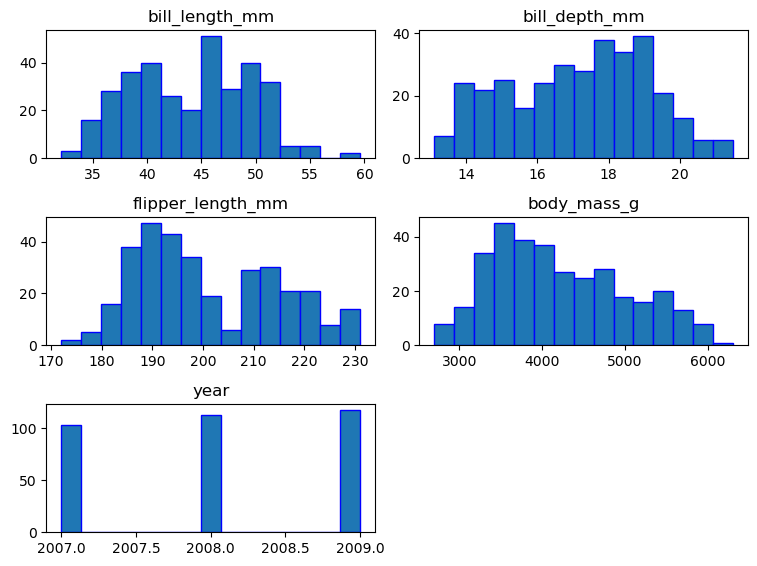

In [149]:
## Plotting histograms -- to see the distributions
data.hist(bins=15,edgecolor='blue',grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

- Based on the histograms shows the distributions of penguin physical measurements and observation years.
1. Bill Length (mm)
Key Insight: Shows variability in bill sizes, suggesting different penguin species or gender differences within the species.
Implication: Useful for identifying species or studying evolutionary traits.
2. Bill Depth (mm)
Key Insight: Multiple peaks indicate variations that could be tied to species differences or adaptations to different diets.
Implication: Bill depth can inform on dietary habits and habitat preferences.
3. Flipper Length (mm)
Key Insight: Relatively normal distribution with a slight skew, indicating consistent trait measurements within the population.
Implication: Indicates less variation in flipper length among the penguins, important for studies on mobility and energy expenditure.
4. Body Mass (g)
Key Insight: Right-skewed distribution suggests most penguins fall within a common weight range, but there are exceptions with higher weights.
Implication: Body mass is crucial for assessing health and survival strategies, such as fat reserves for breeding.
5. Year of Observation
Key Insight: Most data were collected in 2007 and 2008, with very few in 2009.
Implication: Useful for short-term ecological studies but limited for tracking long-term trends.


In [150]:
import plotly
import plotly.express as px
import plotly.offline as pyo
px.scatter(data,x='species',y='bill_length_mm',size='bill_length_mm')

In [151]:
px.bar(data,x='species',y='bill_length_mm')

#### A. Distribution of Species: 
- count of penguins in each type

In [152]:
print(data.groupby('species').size())

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


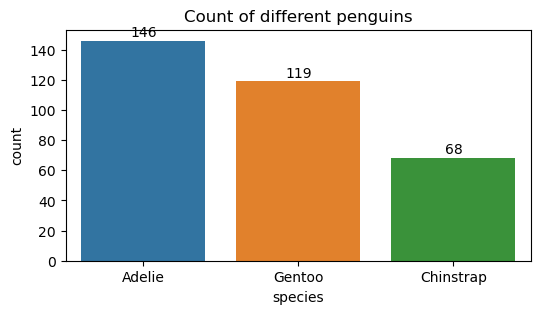

In [153]:
## count of penguins in each type:
plt.figure(figsize=(6,3))
sns.countplot(x="species", data=data)
## to show the count on top of each bar
for index, value in enumerate(data['species'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
    plt.title('Count of different penguins')
plt.show()

This chart highlights differences in sample sizes between species:
- Adelie: This is the most common species in the dataset with 146 individuals.
- Gentoo: The second most common, represented by 119 individuals.
- Chinstrap: The least common among the sampled penguins with 68 individuals.

#### B. Spread of penguins across islands
- How many islands??
- whats the popular destination?

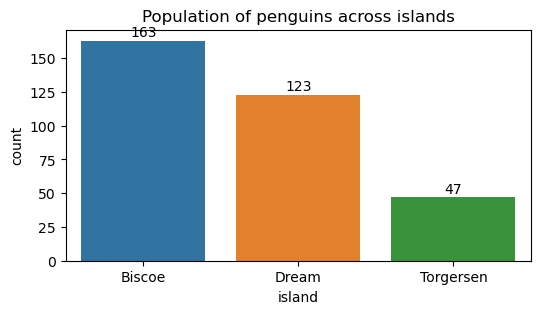

In [154]:
## How many islands??
plt.figure(figsize=(6,3))
sns.countplot(x="island", data=data,order=["Biscoe", "Dream", "Torgersen"])
for index, value in enumerate(data['island'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
    plt.title('Population of penguins across islands')
plt.show()

#### Observations on Penguins Population in 3 different islands:
- Biscoe Island has the highest number of penguin observations with 163 individuals. This suggests that Biscoe Island might be a primary habitat or a popular study site for these penguins. (This could be due to favorable environmental conditions such as optimal nesting sites, abundant food supply, or fewer predators. )
- Dream Island has the  second highest no.of penguins with 123 observations.
- Torgersen Island has the fewest observations with only 47. Smaller penguin population, less frequent research activity, or perhaps less accessibility compared to the other islands.

#### C. How many penguins in each gender? 

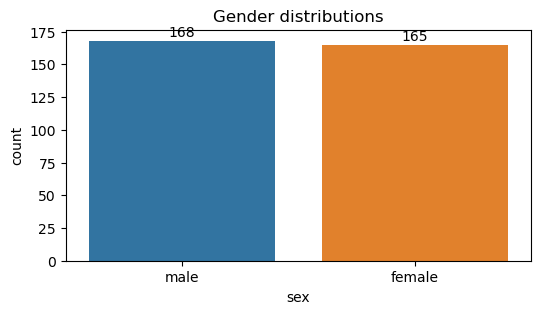

In [155]:
plt.figure(figsize=(6,3))
sns.countplot(x="sex", data=data)
## to show the count on top of each bar
for index, value in enumerate(data['sex'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
    plt.title('Gender distributions')
plt.show()

<Axes: title={'center': 'Gender distributions'}, ylabel='sex'>

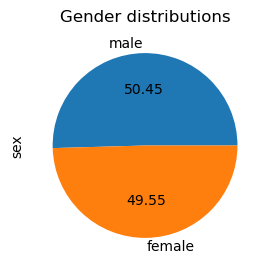

In [156]:
data.sex.value_counts().plot(kind='pie',figsize=[5,3],autopct='%.2f', title='Gender distributions')
## autopct- auto percentage 

#### Balanced Gender Distribution
- The counts for males (168) and females (165) are almost equal.
- sample is well-balanced in terms of gender

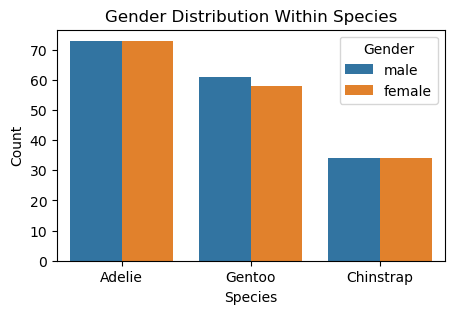

In [157]:
# Visualization: Gender Distribution Within Each Species
plt.figure(figsize=(5,3))
sns.countplot(x='species', hue='sex', data=data)
plt.title('Gender Distribution Within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

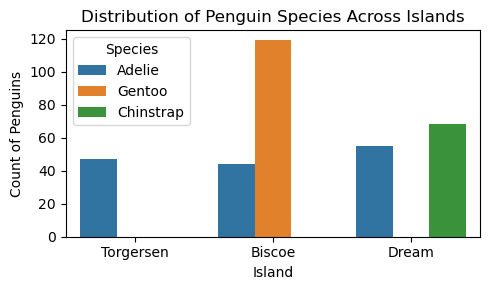

In [158]:
# Setting the aesthetic style of the plots
#sns.set_style("whitegrid")

# Visualization 10: Distribution of Penguin Species across Islands
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='island', hue='species')
plt.title('Distribution of Penguin Species Across Islands')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

### Finding relationship between columns
### 1. Does an increase in bill length correspond to an increase in body mass?

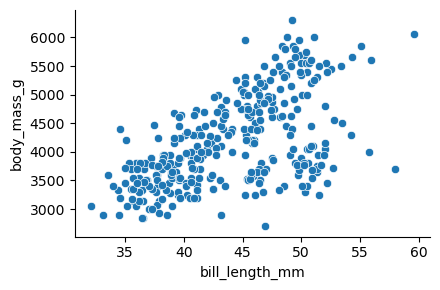

In [159]:
sns.relplot(data=data, x='bill_length_mm',y='body_mass_g',height=3, aspect=1.5)

### Positve correlation:
There is a clear trend where larger bill lengths tend to be associated with higher body mass. This suggests that as penguins grow larger bills, their overall body mass also tends to increase.

but the relationship is not perfectly linear, and there is noticeable scatter, especially as bill length increases.

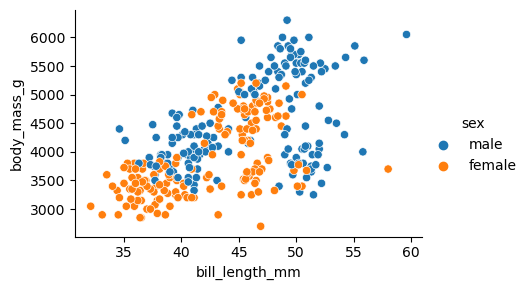

In [160]:
sns.relplot(data=data, x='bill_length_mm',y='body_mass_g',height=3, aspect=1.5, hue='sex')

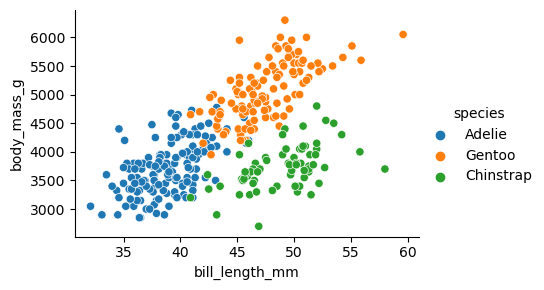

In [161]:
sns.relplot(data=data, x='bill_length_mm',y='body_mass_g',height=3, aspect=1.5, hue='species')

### 2. Does an increase in bill depth correspond to an increase in body mass?

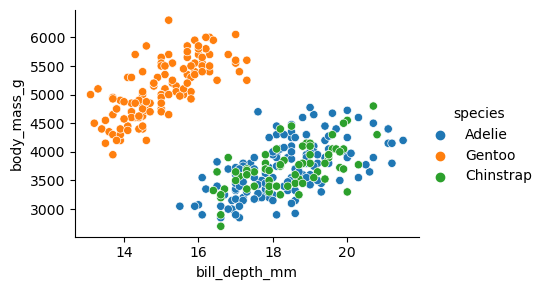

In [162]:
sns.relplot(data=data, x='bill_depth_mm',y='body_mass_g',height=3, aspect=1.5, hue='species')

### 3. Does an increase in flipper length correspond to an increase in body mass?

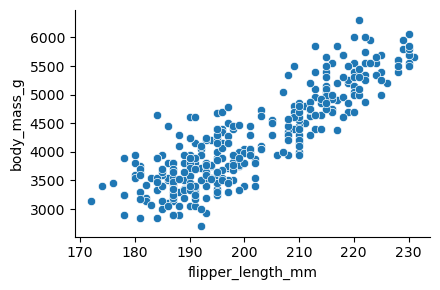

In [163]:
sns.relplot(data=data, x='flipper_length_mm',y='body_mass_g', height=3, aspect=1.5)

### Positive Correlation: 
There is a visible positive correlation between flipper length and body mass. Penguins with longer flippers generally have a higher body mass. This trend is quite linear, suggesting a strong relationship between these two physical attributes.

In [164]:
#sns.relplot(data=data, x='flipper_length_mm',y='body_mass_g', height=3, aspect=1.5,hue='sex')

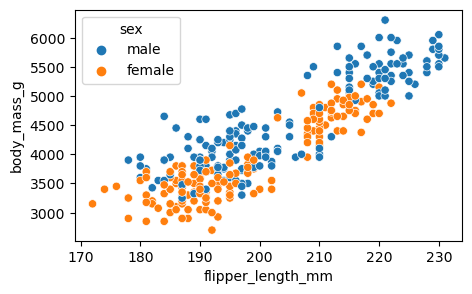

In [165]:
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
plt.figure(figsize=(5,3))
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='sex')

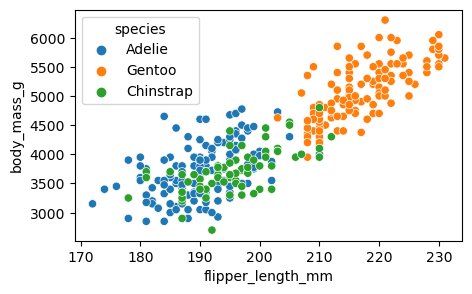

In [166]:
#sns.relplot(data=data, x='flipper_length_mm',y='body_mass_g', height=3, aspect=1.5, hue='species')
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
plt.figure(figsize=(5,3))
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='species')

### 4. Does an increase in bill length correspond to an increase in bill depth?

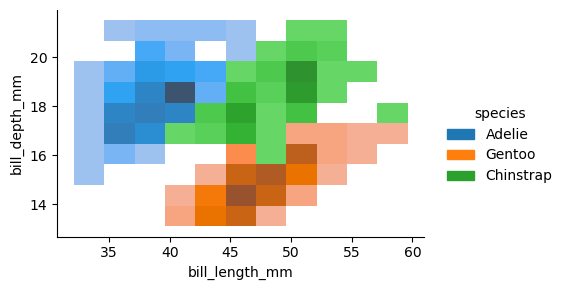

In [167]:
#plt.figure(figsize=(1,1))
sns.displot(data, x="bill_length_mm", y="bill_depth_mm",height=3, aspect=1.5, hue="species")

### Visualization 17: Comparison of Physical Characteristics Across Species
- For this, create a pair plot to visualize the relationships between all physical characteristics

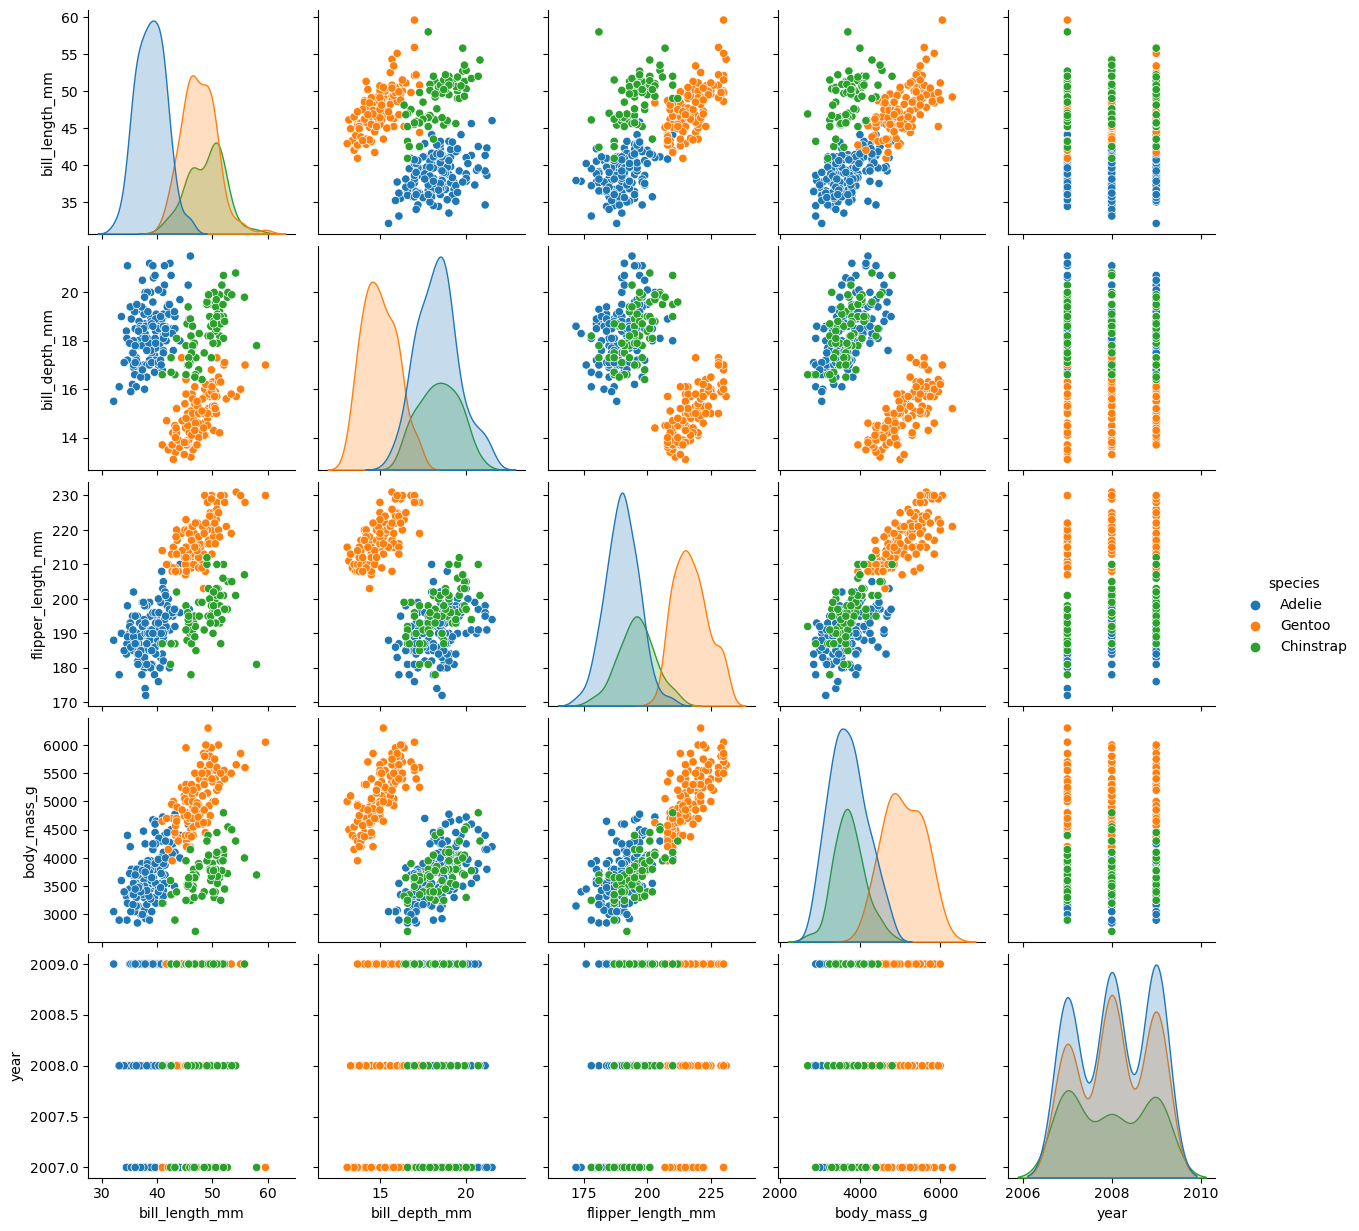

In [168]:
sns.pairplot(data=data,hue='species')  ## for whole data

In [169]:
#sns.pairplot(data)
pd.melt(data)  ## transform the dataset from wide format to long format. 
melted_data = pd.melt(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

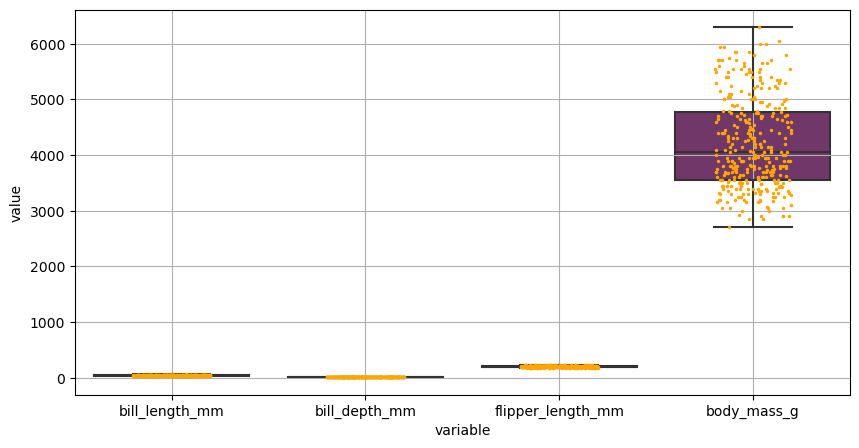

In [170]:
plt.figure(figsize=(10,5))
sns.boxplot(x="variable", y="value", data=melted_data, palette='flare')
sns.stripplot(x="variable", y="value", data=melted_data, color="orange", jitter=0.2, size=2.5)
plt.grid()
plt.show()

- It shows individual measurements, providing insight into the data density and distribution.

#### The presence of outliers in body mass might require further investigation. Are these data errors, or do they represent natural variations?
#### It's also important to consider the ecological and biological relevance of these measurements, which could provide insights into environmental adaptations, feeding habits, or reproductive strategies among different penguin species.

## Finding avg. bill length in each species: 

In [171]:
avg_length= data.groupby(["species"])
avg_length.mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
species                                                                    
Adelie          38.823973      18.347260         190.102740  3706.164384   
Chinstrap       48.833824      18.420588         195.823529  3733.088235   
Gentoo          47.568067      14.996639         217.235294  5092.436975   

                  year  
species                 
Adelie     2008.054795  
Chinstrap  2007.970588  
Gentoo     2008.067227

In [172]:
#avg_bill_length.std()
data.groupby('species').agg({'bill_length_mm': ['mean', 'std']})

bill_length_mm          
                    mean       std
species                           
Adelie         38.823973  2.662597
Chinstrap      48.833824  3.339256
Gentoo         47.568067  3.106116

In [173]:
data.groupby(["sex", "species"])["bill_length_mm"].mean()

sex     species  
female  Adelie       37.257534
        Chinstrap    46.573529
        Gentoo       45.563793
male    Adelie       40.390411
        Chinstrap    51.094118
        Gentoo       49.473770
Name: bill_length_mm, dtype: float64

In [174]:
data.groupby(['island','species', 'sex']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species   sex                                                        
Biscoe    Adelie    female       37.359091      17.704545         187.181818   
                    male         40.590909      19.036364         190.409091   
          Gentoo    female       45.563793      14.237931         212.706897   
                    male         49.473770      15.718033         221.540984   
Dream     Adelie    female       36.911111      17.618519         187.851852   
                    male         40.071429      18.839286         191.928571   
          Chinstrap female       46.573529      17.588235         191.735294   
                    male         51.094118      19.252941         199.911765   
Torgersen Adelie    female       37.554167      17.550000         188.291667   
                    male         40.586957      19.391304         194.913043   

                            body_mass_g         year  
island    species   sex                               
Biscoe    Adelie    female  3369.318182  2008.136364  
                    male    4050.000000  2008.136364  
          Gentoo    female  4679.741379  2008.068966  
                    male    5484.836066  2008.065574  
Dream     Adelie    female  3344.444444  2008.037037  
                    male    4045.535714  2008.000000  
          Chinstrap female  3527.205882  2007.970588  
                    male    3938.970588  2007.970588  
Torgersen Adelie    female  3395.833333  2008.000000  
                    male    4034.782609  2008.043478

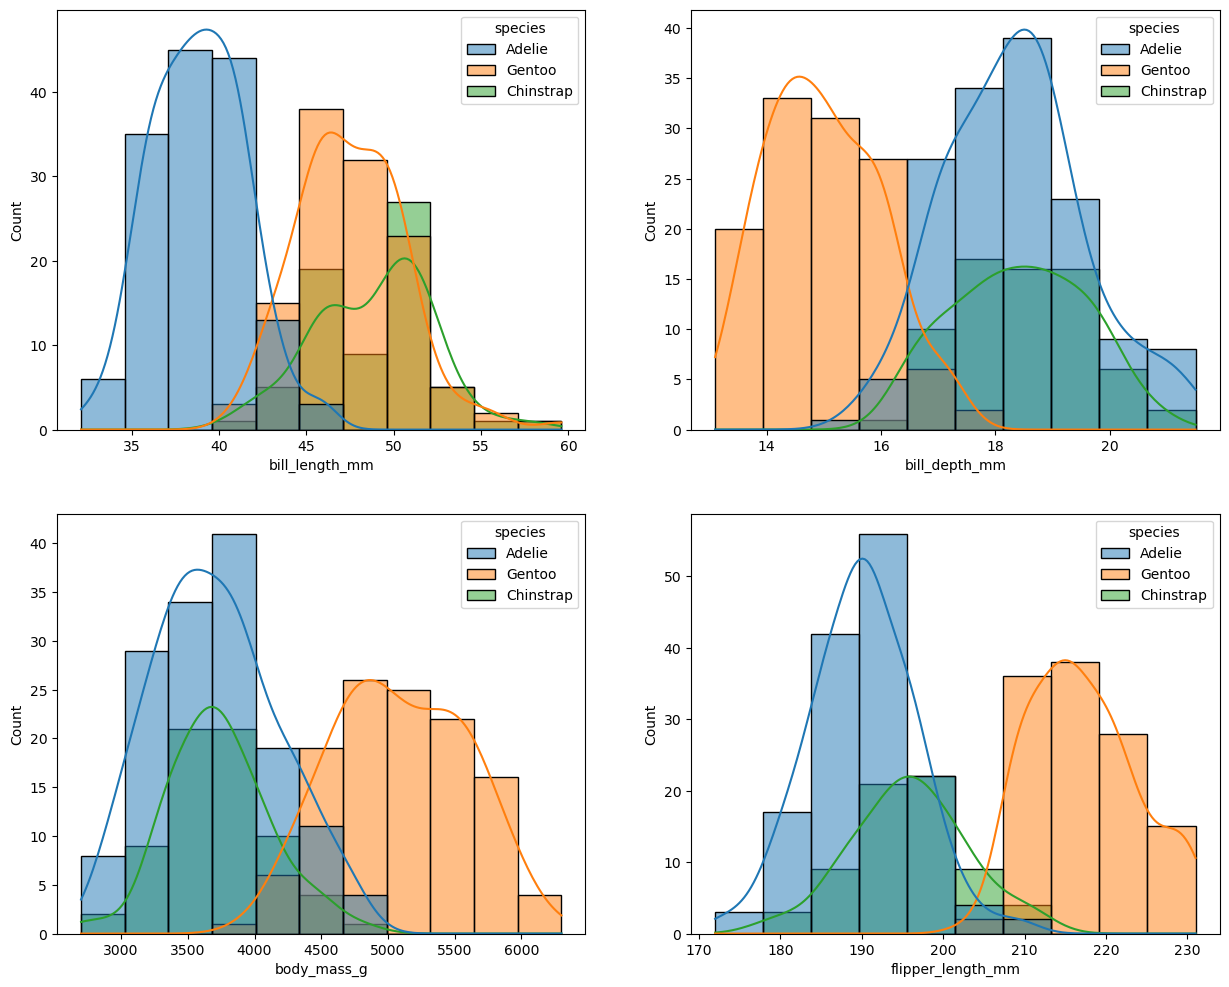

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Histograms for numerical features
sns.histplot(data=data, x="bill_length_mm", hue="species", ax=axes[0, 0], kde=True)
sns.histplot(data=data, x="bill_depth_mm", hue="species", ax=axes[0, 1], kde=True)
sns.histplot(data=data, x="flipper_length_mm", hue="species", ax=axes[1,1], kde=True)
sns.histplot(data=data, x="body_mass_g", hue="species", ax=axes[1, 0], kde=True)

#plt.tight_layout()
plt.show()

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

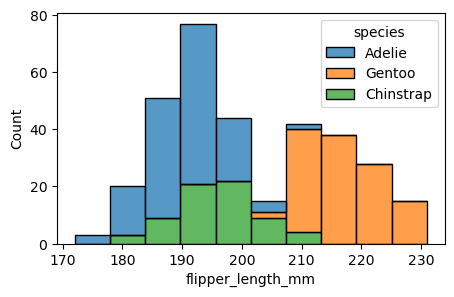

In [176]:
plt.figure(figsize=(5,3))
sns.histplot(data, x="flipper_length_mm", hue="species", multiple="stack",)   ### species wise

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

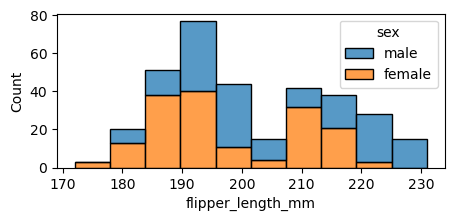

In [177]:
plt.figure(figsize=(5,2))
sns.histplot(data, x="flipper_length_mm", hue="sex" ,multiple="stack",)  ##gender wise

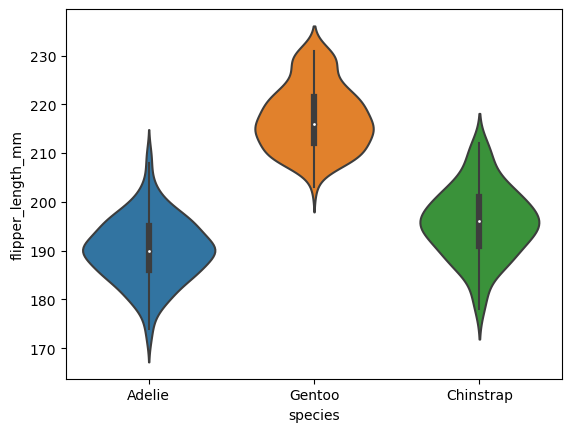

In [178]:
sns.violinplot(data=data, x="species", y="flipper_length_mm", size=5)
plt.show()

<Axes: xlabel='species', ylabel='bill_length_mm'>

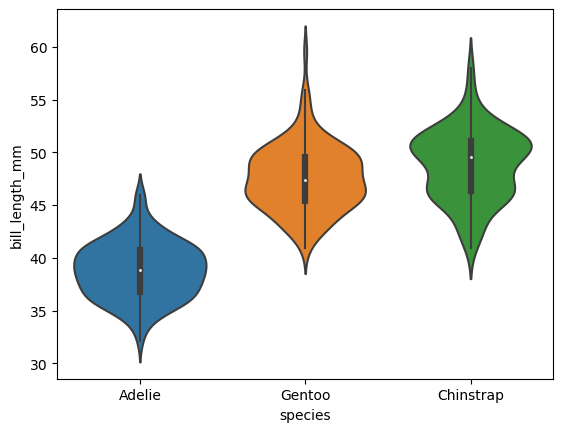

In [179]:
sns.violinplot(x = "species", y = "bill_length_mm", data = data, size = 3)

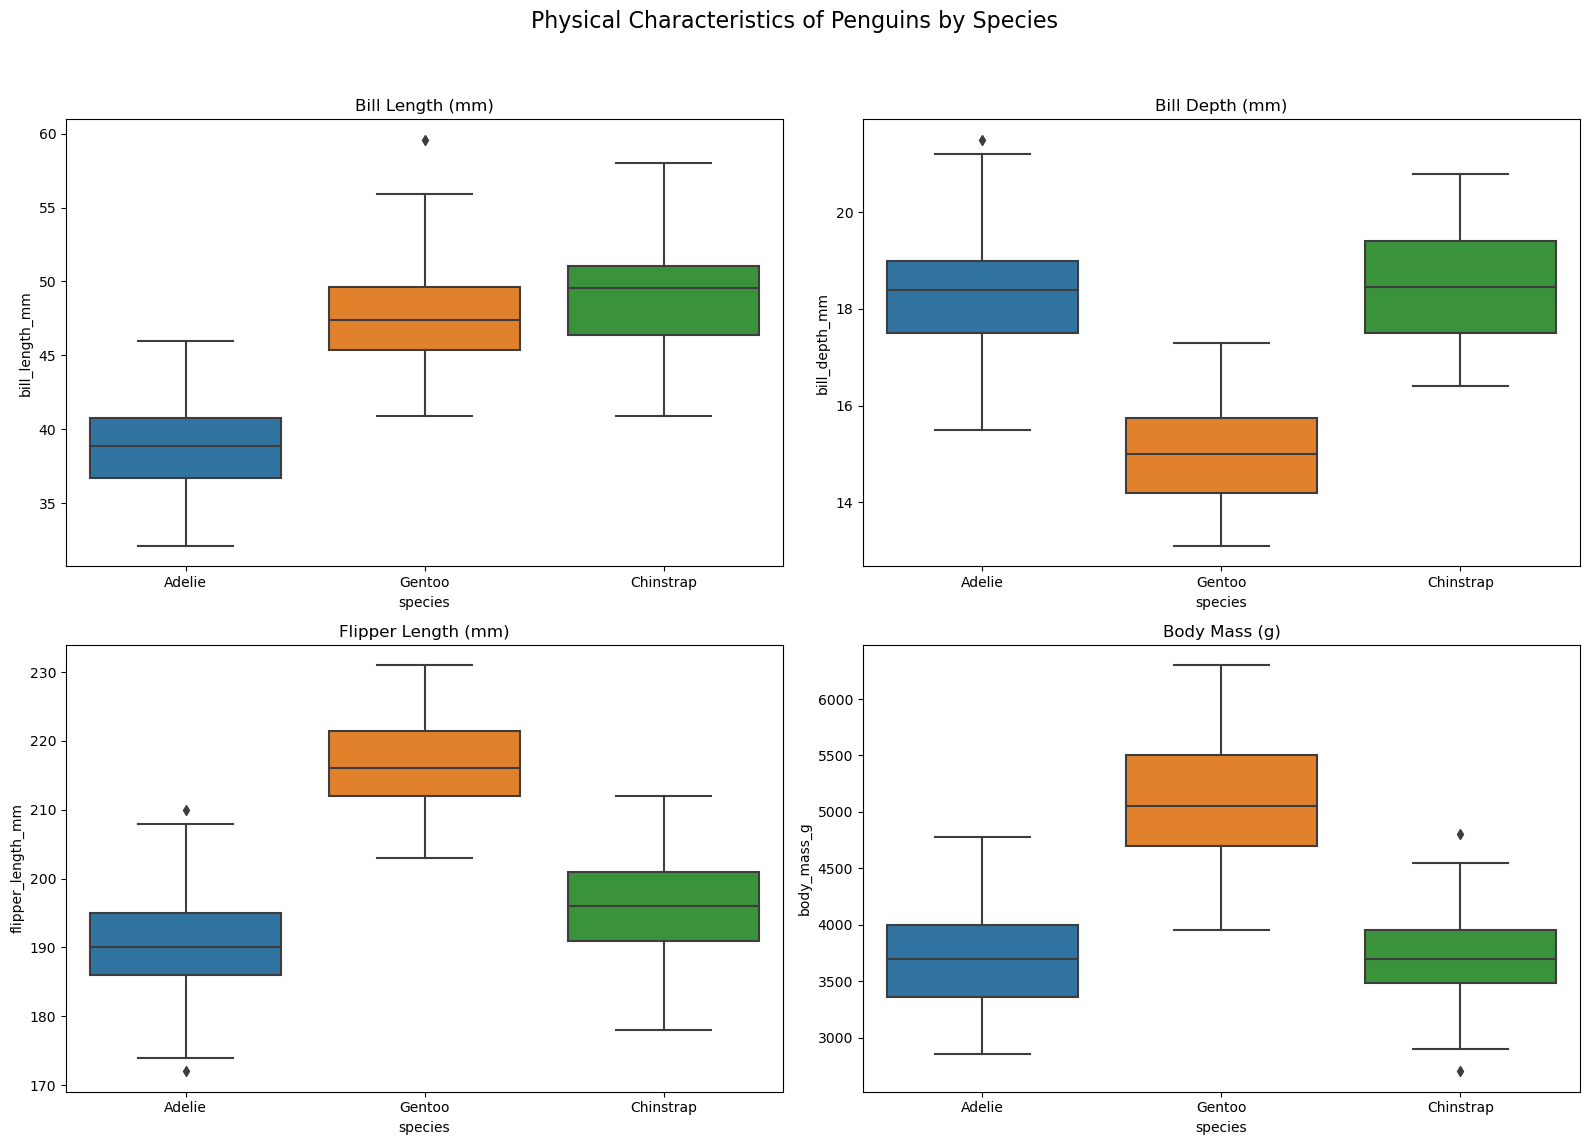

In [180]:
##individual boxplots for each physical characteristic by species.

# # Visualization: Physical Characteristics by Species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Physical Characteristics of Penguins by Species', fontsize=16)

## Bill Length
sns.boxplot(ax=axes[0, 0], data=data, x='species', y='bill_length_mm')
axes[0, 0].set_title('Bill Length (mm)')

## Bill Depth
sns.boxplot(ax=axes[0, 1], data=data, x='species', y='bill_depth_mm')
axes[0, 1].set_title('Bill Depth (mm)')

## Flipper Length
sns.boxplot(ax=axes[1, 0], data=data, x='species', y='flipper_length_mm')
axes[1, 0].set_title('Flipper Length (mm)')

## Body Mass
sns.boxplot(ax=axes[1, 1], data=data, x='species', y='body_mass_g')
axes[1, 1].set_title('Body Mass (g)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data Manipulations

In [181]:
# Group the data by 'island' and 'sex' and count the occurrences
counts = data.groupby(['island', 'sex']).size().unstack()
# Print the counts
print("Counts of female and male penguins separated by island:")
print(counts)

Counts of female and male penguins separated by island:
sex        female  male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23


In [182]:
data['island'].value_counts()  ## count of penguins in each island

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

- Less number of penguins are recorded in Torgersen island.

In [183]:
data['species'].nunique() ## for count

3

In [184]:
#data['species'].nunique() ## for count
data['species'].unique() ## to see what are those 3

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [185]:
data.groupby(["species"]).count()

island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                               
Adelie        146             146            146                146   
Chinstrap      68              68             68                 68   
Gentoo        119             119            119                119   

           body_mass_g  sex  year  
species                            
Adelie             146  146   146  
Chinstrap           68   68    68  
Gentoo             119  119   119

In [186]:
island_genders =data[['island', 'sex']]
island_genders.head()

island     sex
0  Torgersen    male
1  Torgersen  female
2  Torgersen  female
4  Torgersen  female
5  Torgersen    male

In [187]:
#data.iloc[:,[1,6]] ## selecting particular columns..
#choosing body mass and penguin

## Filtering with Logical Operators
# 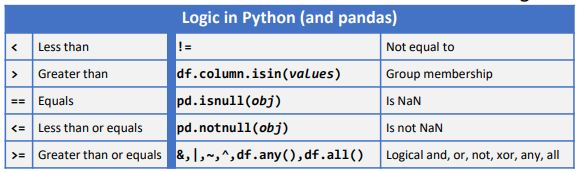

In [188]:
bodymass = data["body_mass_g"] < 3400
sexm = data["sex"] == "male"
data[bodymass & sexm]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
119     Adelie  Torgersen            41.1           18.6              189.0   
292  Chinstrap      Dream            50.3           20.0              197.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g   sex  year  
119       3325.0  male  2009  
292       3300.0  male  2007  
324       3250.0  male  2009

In [189]:
bodymass = data["body_mass_g"] < 3400
billdepthmm = data["bill_depth_mm"] == 20
data[bodymass & billdepthmm ]

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
292  Chinstrap  Dream            50.3           20.0              197.0   

     body_mass_g   sex  year  
292       3300.0  male  2007

In [190]:
bodymass = data["body_mass_g"] < 2900
billdepthmm = data["bill_depth_mm"] == 20
data[bodymass | billdepthmm ]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
36      Adelie   Dream            38.8           20.0              190.0   
58      Adelie  Biscoe            36.5           16.6              181.0   
64      Adelie  Biscoe            36.4           17.1              184.0   
101     Adelie  Biscoe            41.0           20.0              203.0   
103     Adelie  Biscoe            37.8           20.0              190.0   
107     Adelie  Biscoe            38.2           20.0              190.0   
292  Chinstrap   Dream            50.3           20.0              197.0   
305  Chinstrap   Dream            52.8           20.0              205.0   
314  Chinstrap   Dream            46.9           16.6              192.0   

     body_mass_g     sex  year  
36        3950.0    male  2007  
58        2850.0  female  2008  
64        2850.0  female  2008  
101       4725.0    male  2009  
103       4250.0    male  2009  
107       3900.0    male  2009  
292       3300.0    male  2007  
305       4550.0    male  2008  
314       2700.0  female  2008

## correlation between numerical variables:

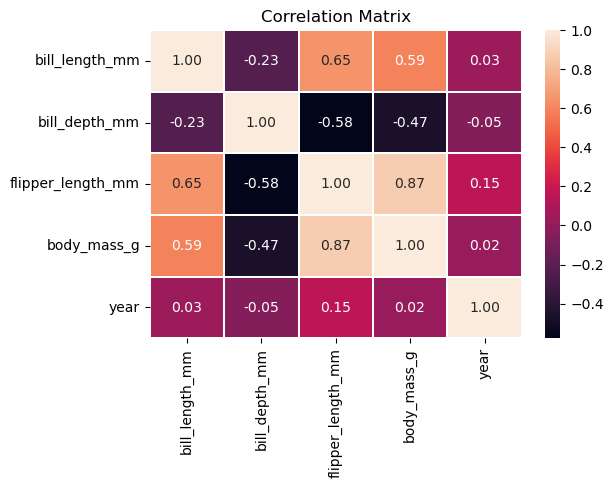

In [191]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.3) ## just 2 numbers after plot
plt.title('Correlation Matrix')
plt.show()

In [192]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
correlation_matrix = data_encoded.corr()
#print("Correlation Matrix:\n", correlation_matrix)  ## caterorial values to num

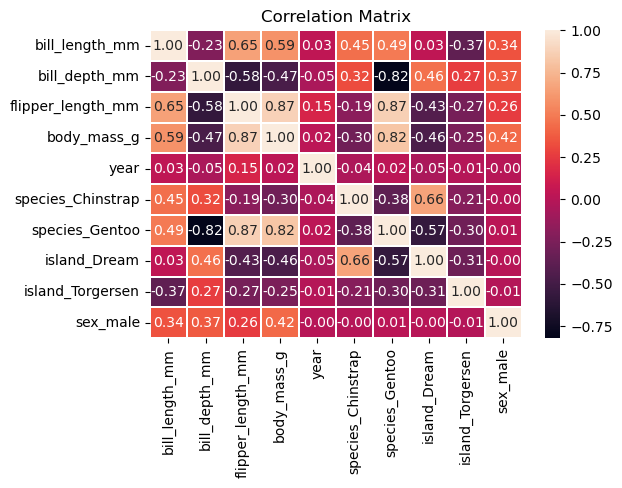

In [193]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.3) ## just 2 numbers after plot
plt.title('Correlation Matrix')
plt.show()

In [194]:
#data_encoded.head(2) ## how it encoded

## Few more visualisations: 

In [195]:
## Species Based Gender 
import plotly.express as px
px.bar( data_frame=data, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=600,height=400 )

In [196]:
fig =px.bar( data_frame=data, y = 'sex',
facet_row='species',facet_row_spacing=0.10,
pattern_shape='species',
color='species',
color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
width=500,height=300 )
fig.show()

In [197]:
## plot based on gender
fig = px.scatter(data_frame=data, x='flipper_length_mm' , y = 'body_mass_g', 
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=300,title='Species based Gender scatter plot', 
                   titlefont = dict(size =36, color='black', family='Open Sans',), 
                   font=dict(size=14,color='black'))
fig.show()

## Recommendations for Improvement and Next Steps:
Data Cleaning: Further inspection of data quality might be needed. For instance, handling outliers if any are detected in physical measurements.

Feature Engineering: Consider creating new features that might help improve model performance, such as interactions between features or polynomial features.

Model Expansion: Experiment with other models like Decision Trees, Random Forest, or ensemble methods to see if they offer better performance.

In-depth Analysis: More detailed analysis of model misclassifications could provide insights into where models fail and how they might be improved.

Model Interpretability: Utilize tools or techniques to interpret model decisions, which is critical in making your findings actionable and trustworthy.

# 2.  UNSUPERVISED- KMEANS

- Clustering goal is to, preficting the type of penguin, groupings among penguins based on their physical characteristics (such as bill length, bill depth, flipper length, body mass, and potentially where they were found or their sex), then the year the data was collected may not provide meaningful insight into these clusters.
- Year is not contributing to the clustering/ in predicting the type

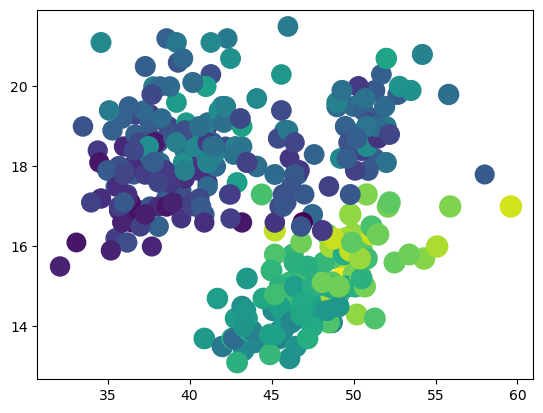

In [198]:
plt.scatter(data['bill_length_mm'],data['bill_depth_mm'],data['flipper_length_mm'],data['body_mass_g'])

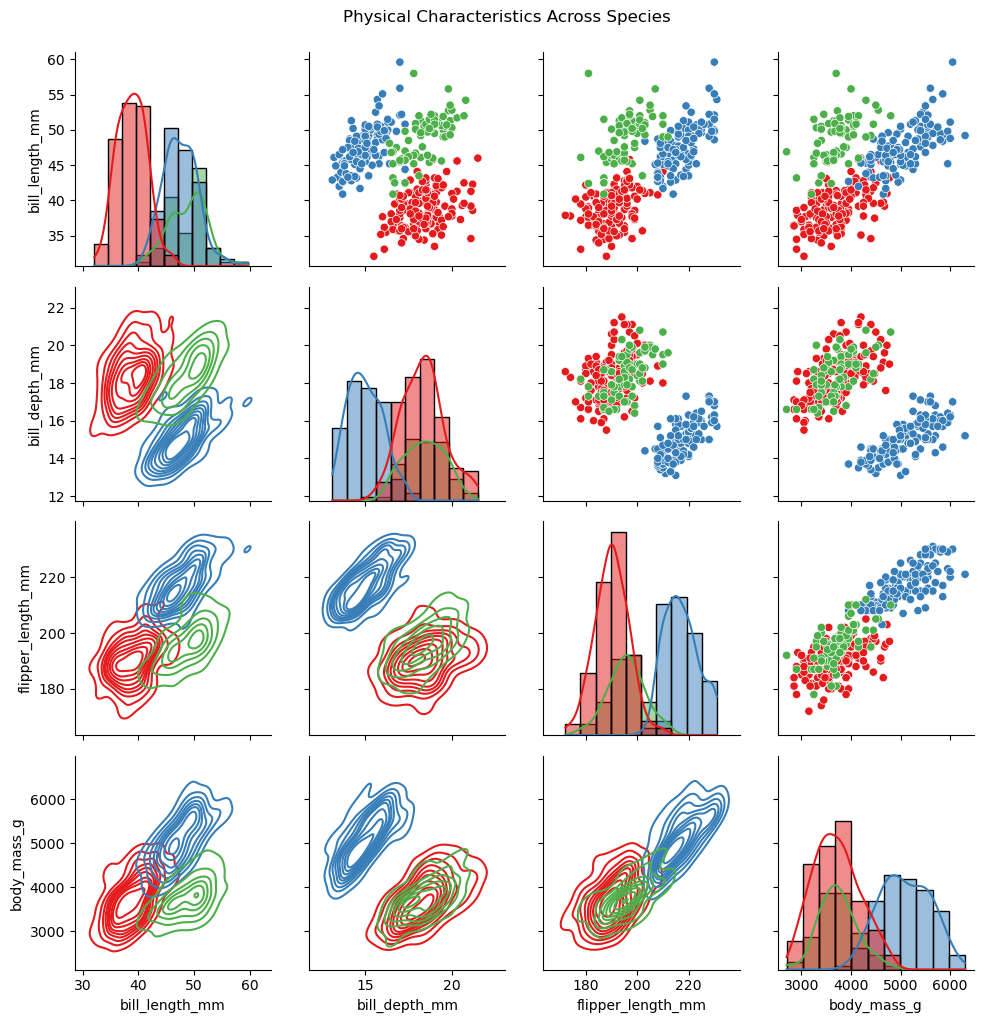

In [199]:
# Set up the PairGrid
g = sns.PairGrid(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1')

# Map the plots to the grid
g = g.map_upper(sns.scatterplot)  # Scatter plot on the upper triangle
g = g.map_lower(sns.kdeplot)      # KDE plot on the lower triangle
g = g.map_diag(sns.histplot, kde=True)  # Histogram with KDE on the diagonal

# Add a title and show the plot
plt.suptitle('Physical Characteristics Across Species', y=1.02)
plt.show()


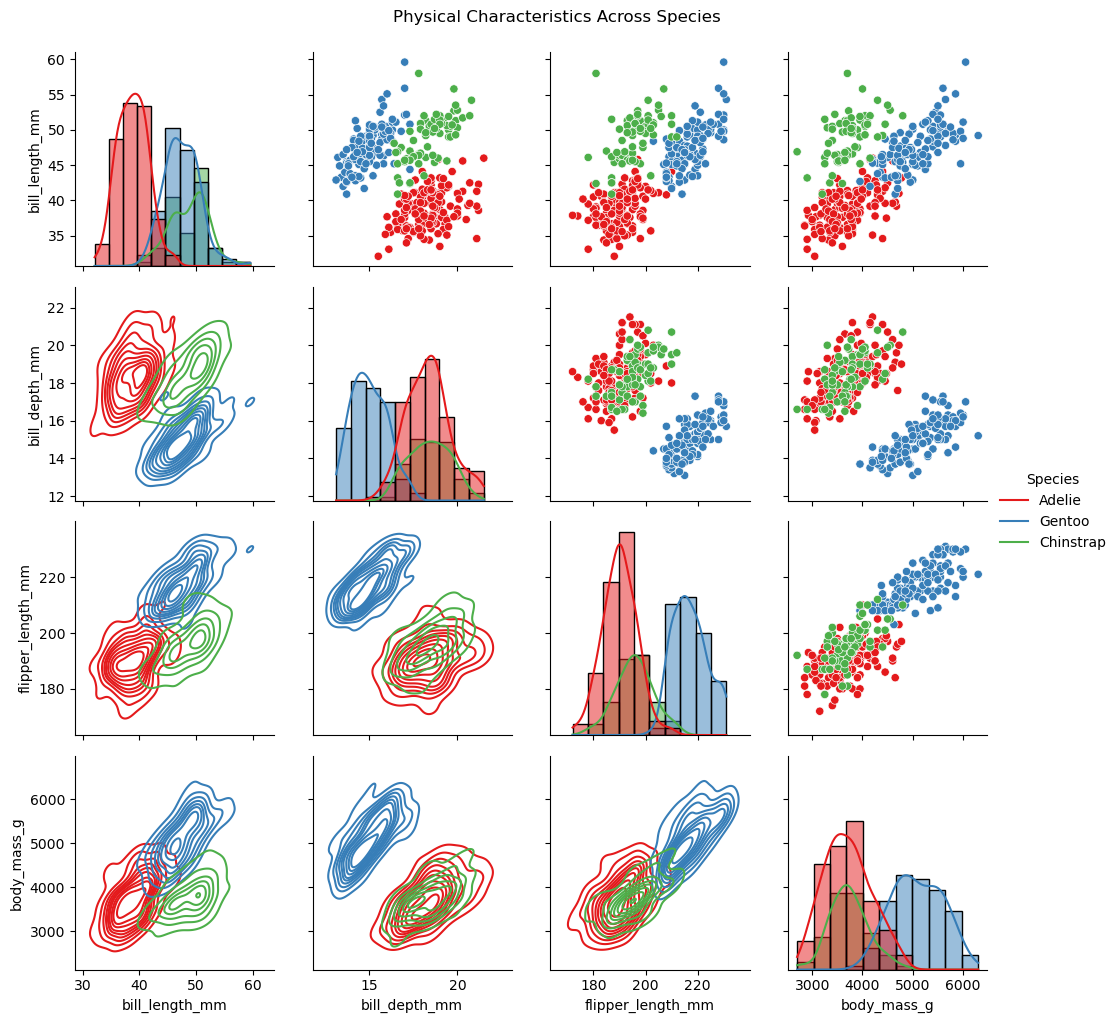

In [200]:
# Setup for the PairGrid using seaborn
g = sns.PairGrid(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1')

# Mapping the plots to the grid
g = g.map_upper(sns.scatterplot)  # Scatter plot on the upper triangle
g = g.map_lower(sns.kdeplot)  # KDE plot with fill on the lower triangle
g = g.map_diag(sns.histplot, kde=True)  # Histogram with KDE on the diagonal

# Adding a legend and title
g.add_legend(title='Species')
plt.suptitle('Physical Characteristics Across Species', y=1.02)
plt.show()

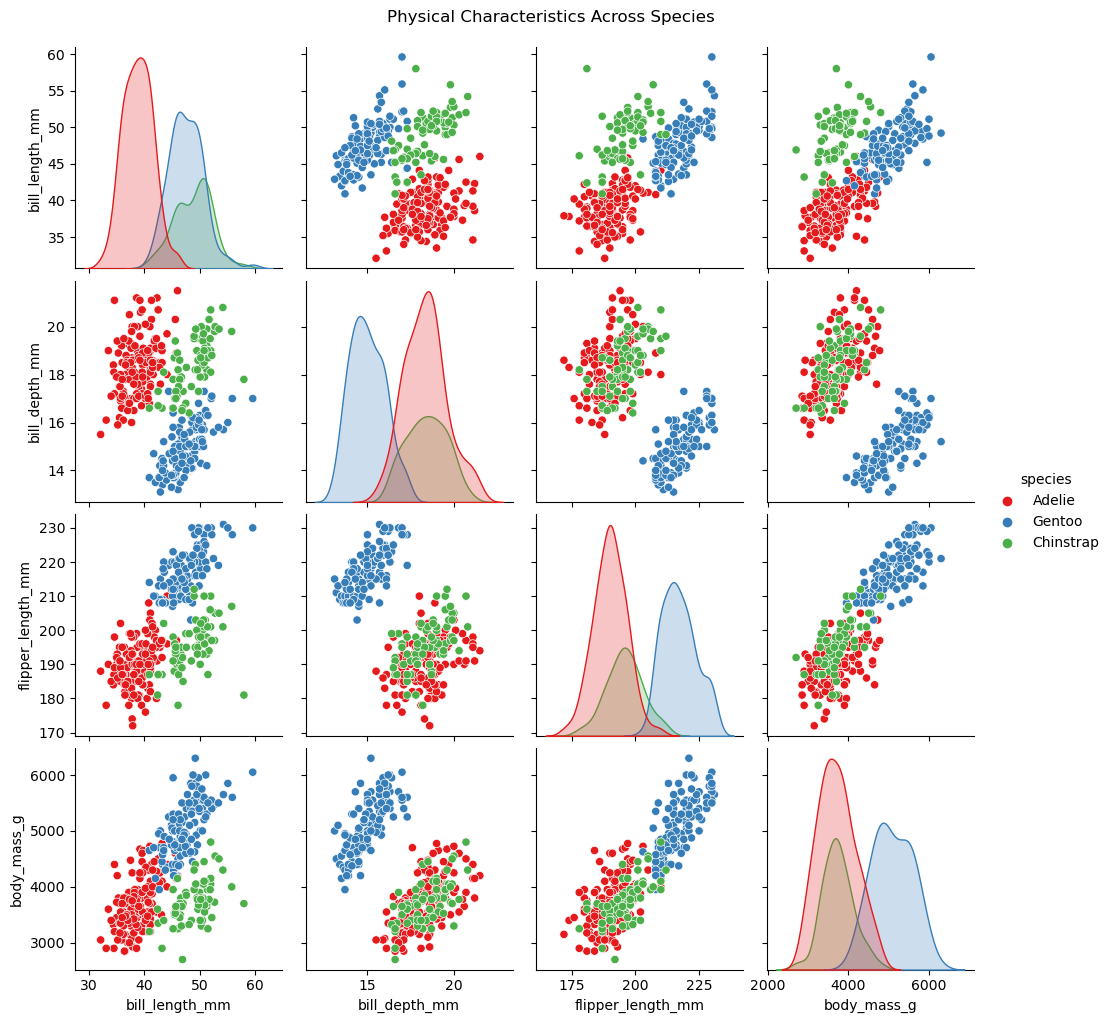

In [201]:
sns.pairplot(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1', diag_kind="kde")
plt.suptitle('Physical Characteristics Across Species', y=1.02)
plt.show()

### Step 1: Feature Selection and Data Preparation
Selecting relevant features for clustering, ensuring they are scaled to prevent any feature from disproportionately influencing the results.

- Data Wrangling

In [202]:
data.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007

In [203]:
data['sex']= data['sex'].map({'male':1, 'female':0})

In [204]:
X=data.drop(['species','island','year'],axis=1)
X

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1           18.7              181.0       3750.0    1
1              39.5           17.4              186.0       3800.0    0
2              40.3           18.0              195.0       3250.0    0
4              36.7           19.3              193.0       3450.0    0
5              39.3           20.6              190.0       3650.0    1
..              ...            ...                ...          ...  ...
339            55.8           19.8              207.0       4000.0    1
340            43.5           18.1              202.0       3400.0    0
341            49.6           18.2              193.0       3775.0    1
342            50.8           19.0              210.0       4100.0    1
343            50.2           18.7              198.0       3775.0    0

[333 rows x 5 columns]

In [205]:
y=data['species']
y

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

In [206]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [207]:
print(le.classes_)

['Adelie' 'Chinstrap' 'Gentoo']


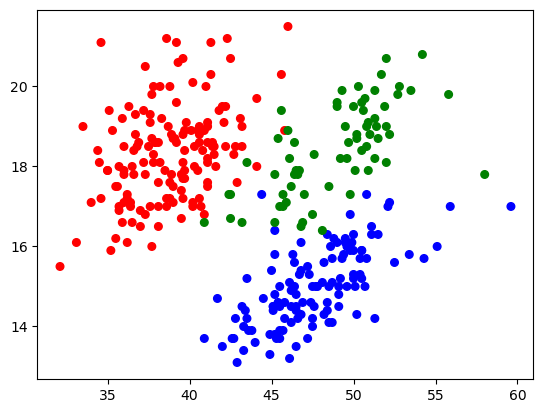

In [208]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(data['bill_length_mm'],data['bill_depth_mm'],c=colormap[y],s=30)

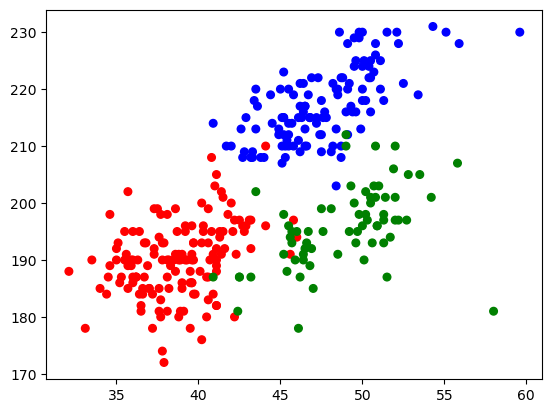

In [209]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(data['bill_length_mm'],data['flipper_length_mm'],c=colormap[y],s=30)

### Step 2: Determine Optimal Number of Clusters
Using the Elbow Method, determine the most appropriate number of clusters for K-means clustering.

[0 1 2]


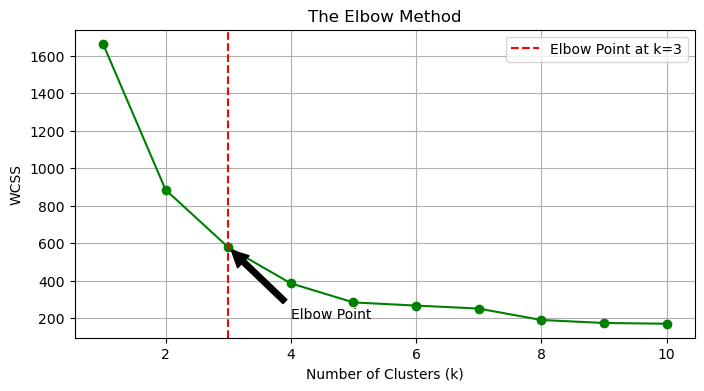

Silhouette Score: 0.45
[[ 0.65475809 -1.10270671  1.16246305  1.10121078  0.01620173]
 [-0.6913414   0.22700272 -0.85176774 -0.97996572 -1.00904996]
 [-0.03684751  0.99937203 -0.441065   -0.24474533  0.99103121]]


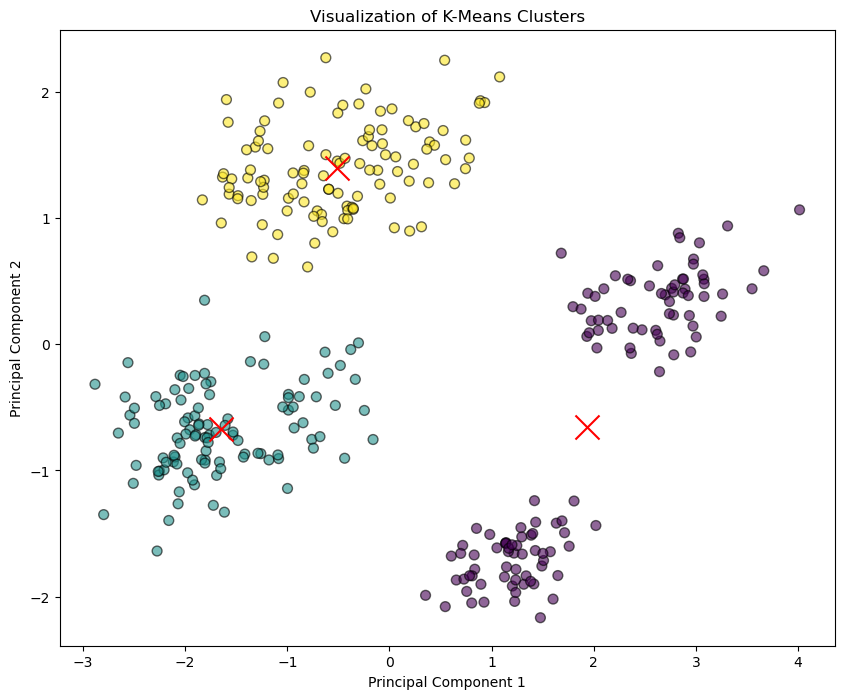

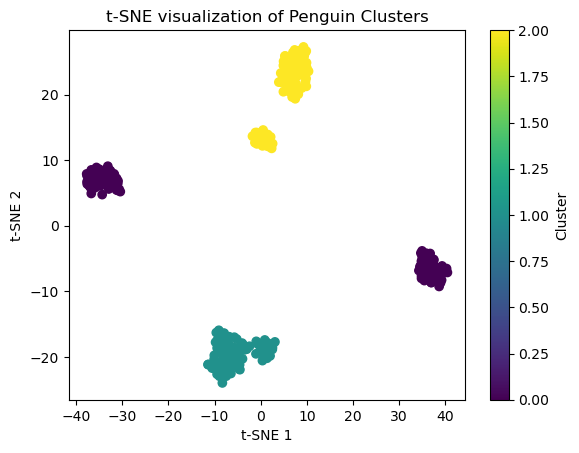

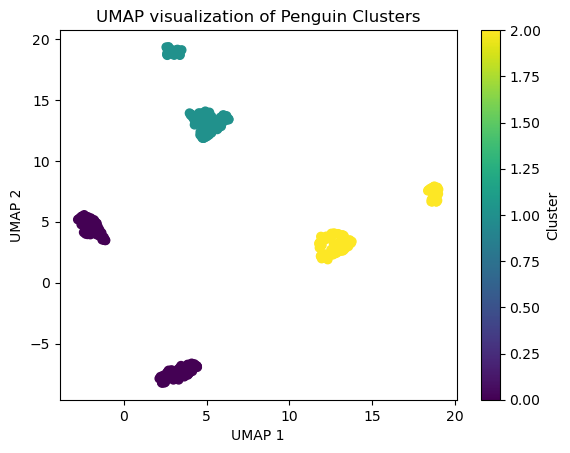

Predicted    0   1   2
Actual                
Adelie       0  73  73
Chinstrap    0  34  34
Gentoo     119   0   0
Adjusted Rand Index: 0.54
   Actual  Predicted
0       2          0
1       0          1
2       1          1
3       0          1
4       0          1
   Actual  Predicted
0       0          1
1       1          1
2       0          1
3       2          0
4       0          1
Training Silhouette Score: 0.43919821341409043
Testing Silhouette Score: 0.38045934825930083
Training Adjusted Rand Index (ARI): 0.5189822614066117
Testing Adjusted Rand Index (ARI): 0.444061711508485
Training Adjusted Mutual Information (AMI): 0.6175291424843808
Testing Adjusted Mutual Information (AMI): 0.5780258174281271
Training Davies-Bouldin Index: 0.71591440356378
Testing Davies-Bouldin Index: 0.738260832123426
Training Calinski-Harabasz Index: 200.65922066370675
Testing Calinski-Harabasz Index: 31.726586975122064


In [210]:
# Encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Step 2: Determine Optimal Number of Clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.axvline(x=3, color='red', linestyle='--', label='Elbow Point at k=3')
plt.annotate('Elbow Point', xy=(3, wcss[2]), xytext=(4, 200),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend()
plt.show()

# Step 3: Custom K-Means Implementation with Explicit Euclidean Distance Calculation
def initialize_centroids(data, k):
    """Randomly initialize centroids."""
    indices = random.sample(range(len(data)), k)
    return data[indices, :]

def euclidean_distance(a, b):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(data, centroids):
    """Assign data points to the nearest centroid."""
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, labels, k):
    """Update centroids to the mean of assigned points."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100):
    """Custom K-Means algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Apply the custom K-Means algorithm
optimal_k = 3  # Example optimal k
labels, centroids = kmeans(scaled_features, optimal_k)

# Add cluster labels to the original dataframe
data['cluster'] = labels

# Step 4: Visualization and Analysis of Clusters
# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Cluster centers
print(centroids)

# Plotting clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, marker='o', edgecolor='black', s=50, alpha=0.6)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], s=300, c='red', marker='x')
plt.title('Visualization of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Adding distance to center
from sklearn.metrics import pairwise_distances_argmin_min
distances, _ = pairwise_distances_argmin_min(scaled_features, centroids)
data['Distance_to_Center'] = distances

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE visualization of Penguin Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

# UMAP visualization
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(scaled_features)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis')
plt.title('UMAP visualization of Penguin Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Validate and Interpret Clusters
contingency_table = pd.crosstab(index=data['species'], columns=data['cluster'], rownames=['Actual'], colnames=['Predicted'])
print(contingency_table)

# Calculate ARI
ari_score = adjusted_rand_score(data['species'], data['cluster'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KMeans model
km = KMeans(n_clusters=3, max_iter=300, random_state=42, init='k-means++', tol=1e-4)
km.fit(X_train_scaled)

# Make predictions
train_predictions = km.predict(X_train_scaled)
test_predictions = km.predict(X_test_scaled)

# Combine predictions with actual labels for further analysis
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

# Display the first few results
print(train_results.head())
print(test_results.head())

# Calculate the Silhouette Score for the training and testing data
train_silhouette_score = silhouette_score(X_train_scaled, train_predictions)
print(f'Training Silhouette Score: {train_silhouette_score}')
test_silhouette_score = silhouette_score(X_test_scaled, test_predictions)
print(f'Testing Silhouette Score: {test_silhouette_score}')

# Evaluate Clustering with Ground Truth
# Calculate Adjusted Rand Index (ARI)
train_ari = adjusted_rand_score(y_train, train_predictions)
test_ari = adjusted_rand_score(y_test, test_predictions)
print(f'Training Adjusted Rand Index (ARI): {train_ari}')
print(f'Testing Adjusted Rand Index (ARI): {test_ari}')

# Calculate Adjusted Mutual Information (AMI)
train_ami = adjusted_mutual_info_score(y_train, train_predictions, average_method='arithmetic')
test_ami = adjusted_mutual_info_score(y_test, test_predictions, average_method='arithmetic')
print(f'Training Adjusted Mutual Information (AMI): {train_ami}')
print(f'Testing Adjusted Mutual Information (AMI): {test_ami}')

# Calculate Davies-Bouldin Index
train_db_index = davies_bouldin_score(X_train_scaled, train_predictions)
test_db_index = davies_bouldin_score(X_test_scaled, test_predictions)
print(f'Training Davies-Bouldin Index: {train_db_index}')
print(f'Testing Davies-Bouldin Index: {test_db_index}')

# Calculate Calinski-Harabasz Index
train_ch_index = calinski_harabasz_score(X_train_scaled, train_predictions)
test_ch_index = calinski_harabasz_score(X_test_scaled, test_predictions)
print(f'Training Calinski-Harabasz Index: {train_ch_index}')
print(f'Testing Calinski-Harabasz Index: {test_ch_index}')


### Step 3: Apply K-Means Clustering
Using the identified optimal number of clusters, apply K-means to segment the data.

In [211]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42,init='k-means++')
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [212]:
centers=km.cluster_centers_
print(centers)

[[4.11221429e+01 1.79464286e+01 1.89628571e+02 3.46125000e+03
  2.64285714e-01]
 [4.86625000e+01 1.53975000e+01 2.19987500e+02 5.36593750e+03
  7.50000000e-01]
 [4.42433628e+01 1.74477876e+01 2.01548673e+02 4.31061947e+03
  6.28318584e-01]]


In [213]:
km.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,

### Step 4: Visualization and Analysis of Clusters
Visualize and interpret how the clusters are formed based on the scaled features.

### Step 5: Validate and Interpret Clusters
Assess how these clusters relate to known variables like species or geographic location.

In [214]:
Catagory_kmeans=['Adelie', 'Chinstrap','Gentoo']

In [215]:
Catagory_kmeans

['Adelie', 'Chinstrap', 'Gentoo']

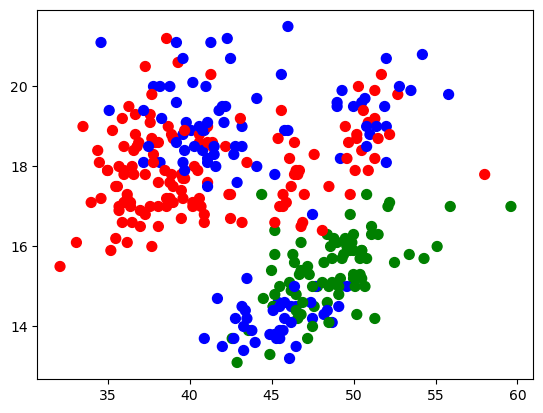

In [216]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(data['bill_length_mm'],data['bill_depth_mm'],c=colormap[km.labels_],s=50)

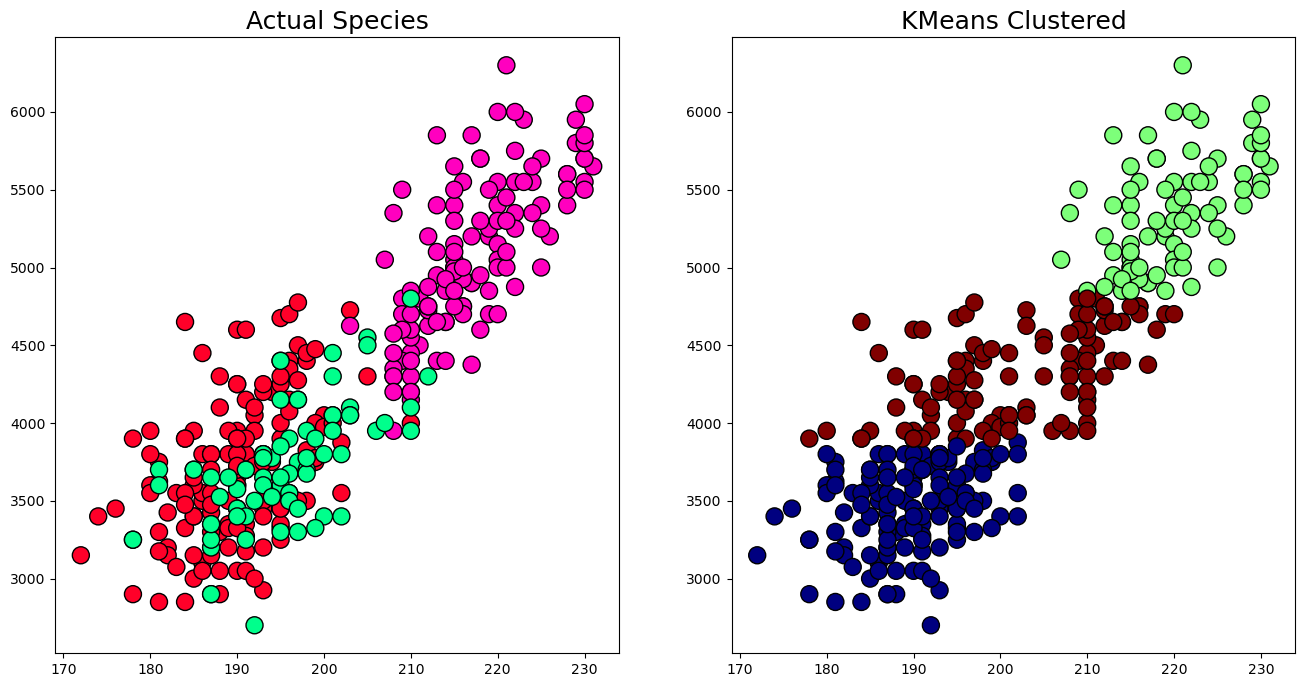

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# Convert DataFrame to numpy array if not already done
X_array = X.to_numpy()

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot actual species labels
axes[0].scatter(X_array[:, 2], X_array[:, 3], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_title('Actual Species', fontsize=18)

# Plot KMeans predicted clusters
axes[1].scatter(X_array[:, 2], X_array[:, 3], c=km.labels_, cmap='jet', edgecolor='k', s=150)
axes[1].set_title('KMeans Clustered', fontsize=18)

plt.show()


## Evaluate Clustering with Ground Truth

In [218]:
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score

# Create a contingency table
contingency_table = pd.crosstab(index=data['species'], columns=km.labels_, rownames=['Actual'], colnames=['Predicted'])
print(contingency_table)

Predicted   0   1   2
Actual               
Adelie     94   0  52
Chinstrap  46   0  22
Gentoo      0  80  39


# 

Contingency Table Analysis:

Cluster 0: Contains a mix of all three species, predominantly Adelie and Gentoo.

Cluster 1: Primarily consists of Gentoo penguins.

Cluster 2: Contains predominantly Adelie and a significant number of Chinstrap.

For n_clusters = 3 the average silhouette_score is : 0.45101024097188364
For n_clusters = 4 the average silhouette_score is : 0.4489699212061028
For n_clusters = 5 the average silhouette_score is : 0.5199985748608682
For n_clusters = 6 the average silhouette_score is : 0.5257260332987352
For n_clusters = 7 the average silhouette_score is : 0.47774022332151744
For n_clusters = 8 the average silhouette_score is : 0.4057435827001716
For n_clusters = 9 the average silhouette_score is : 0.3739368778291476


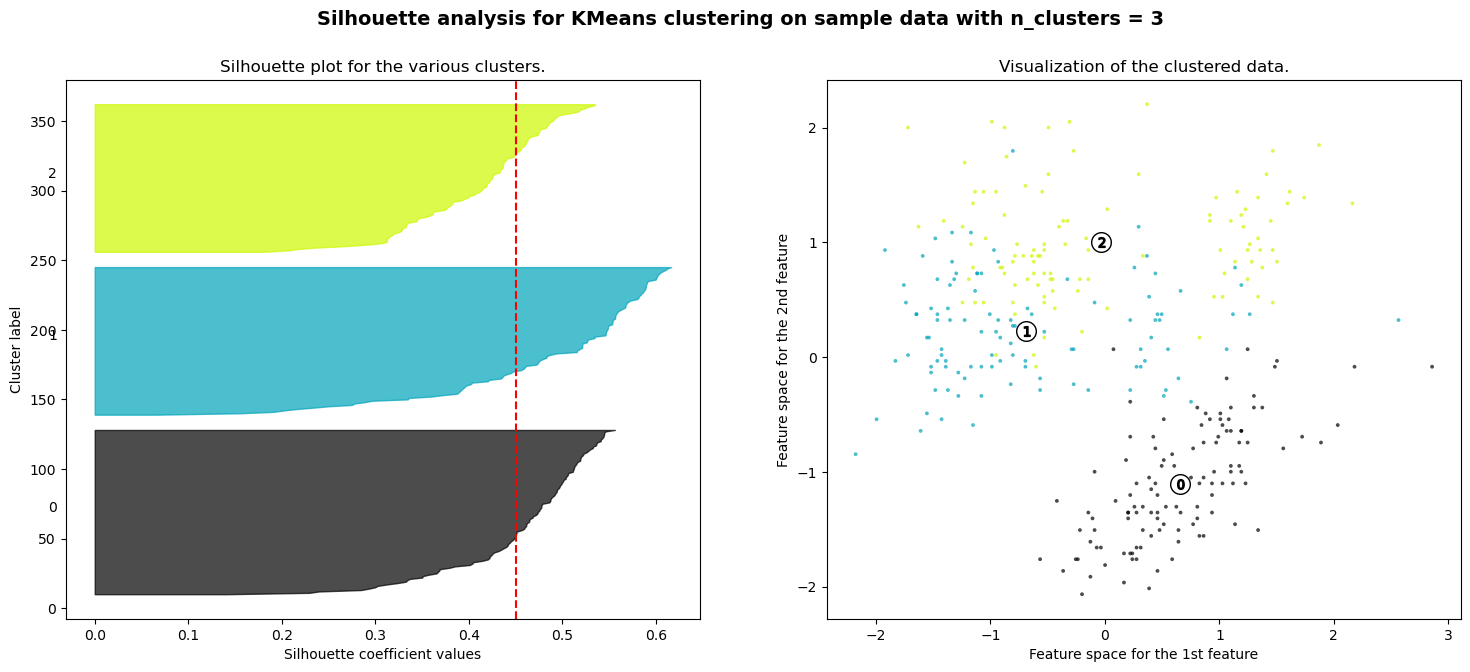

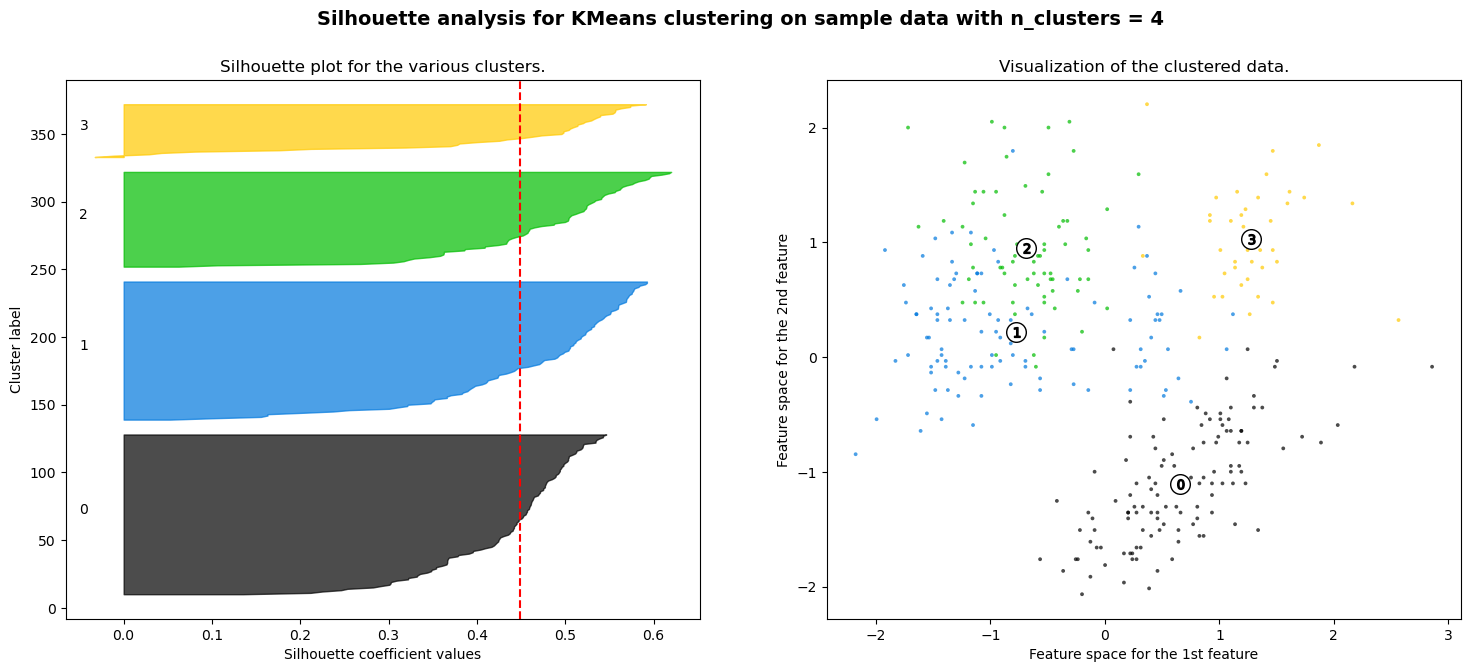

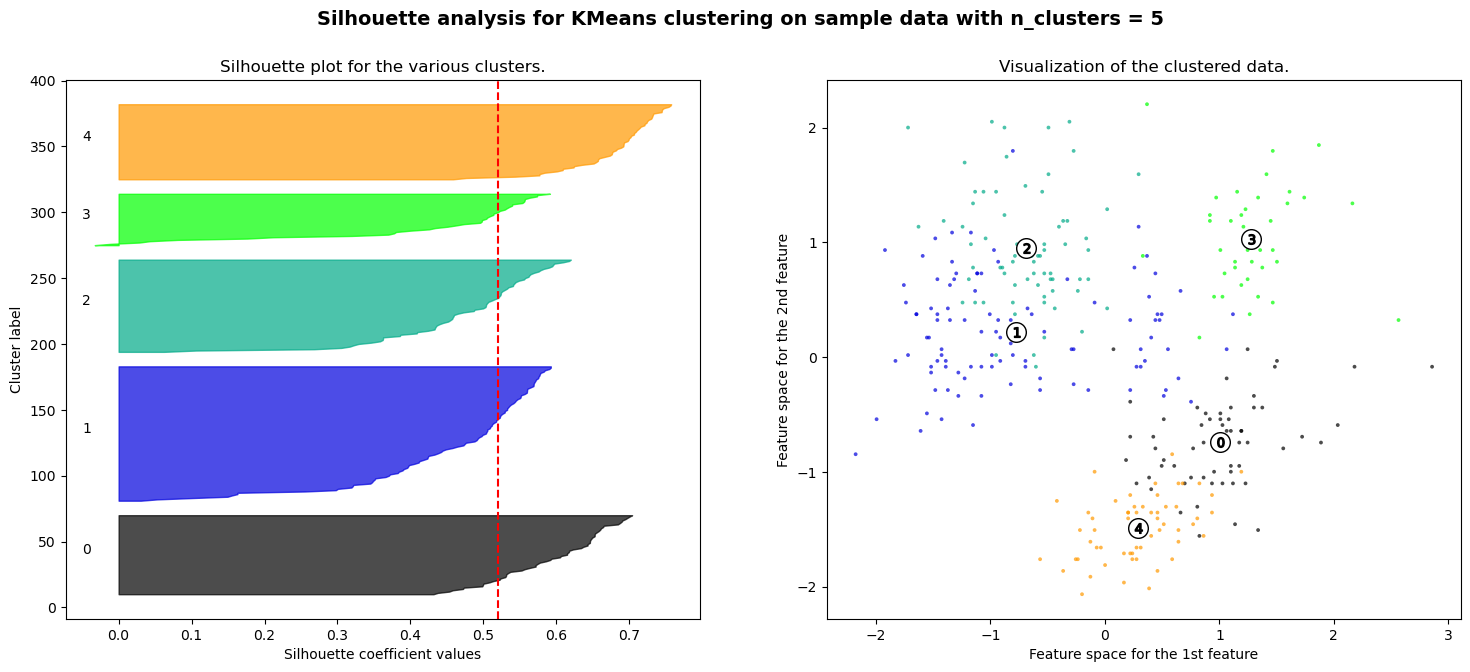

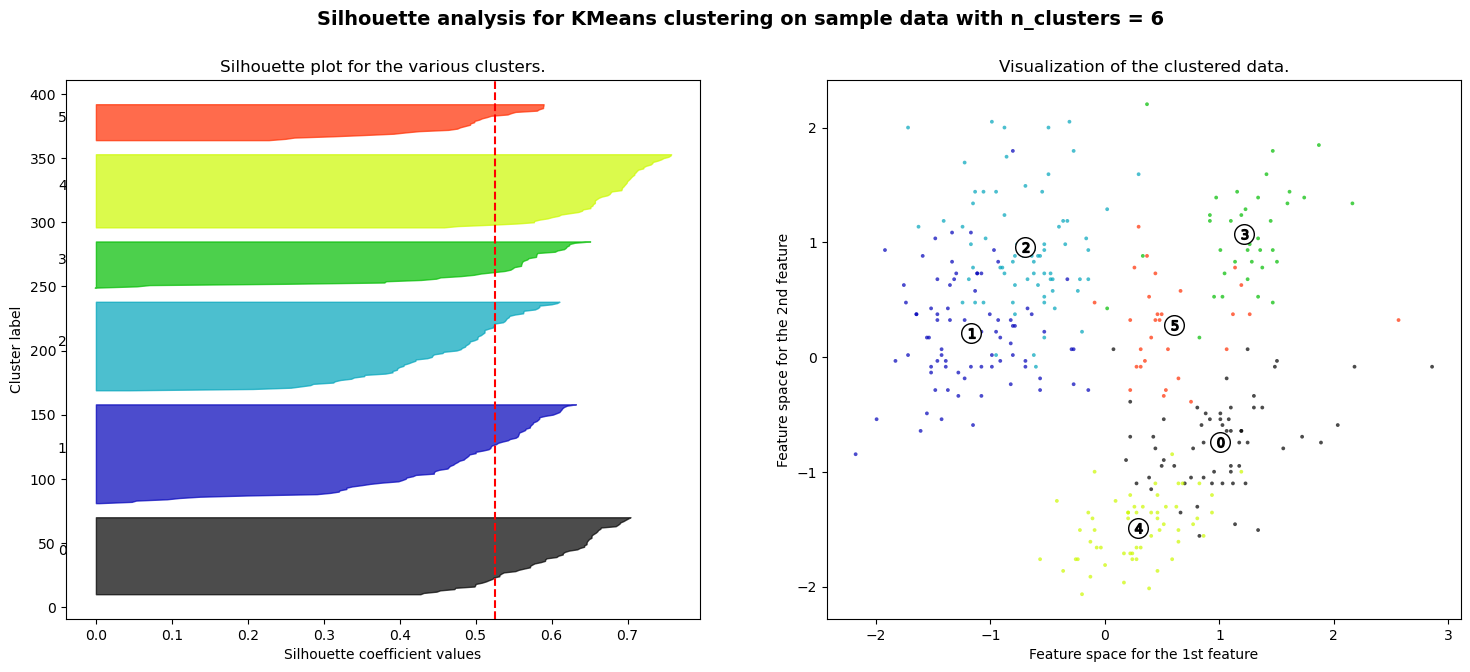

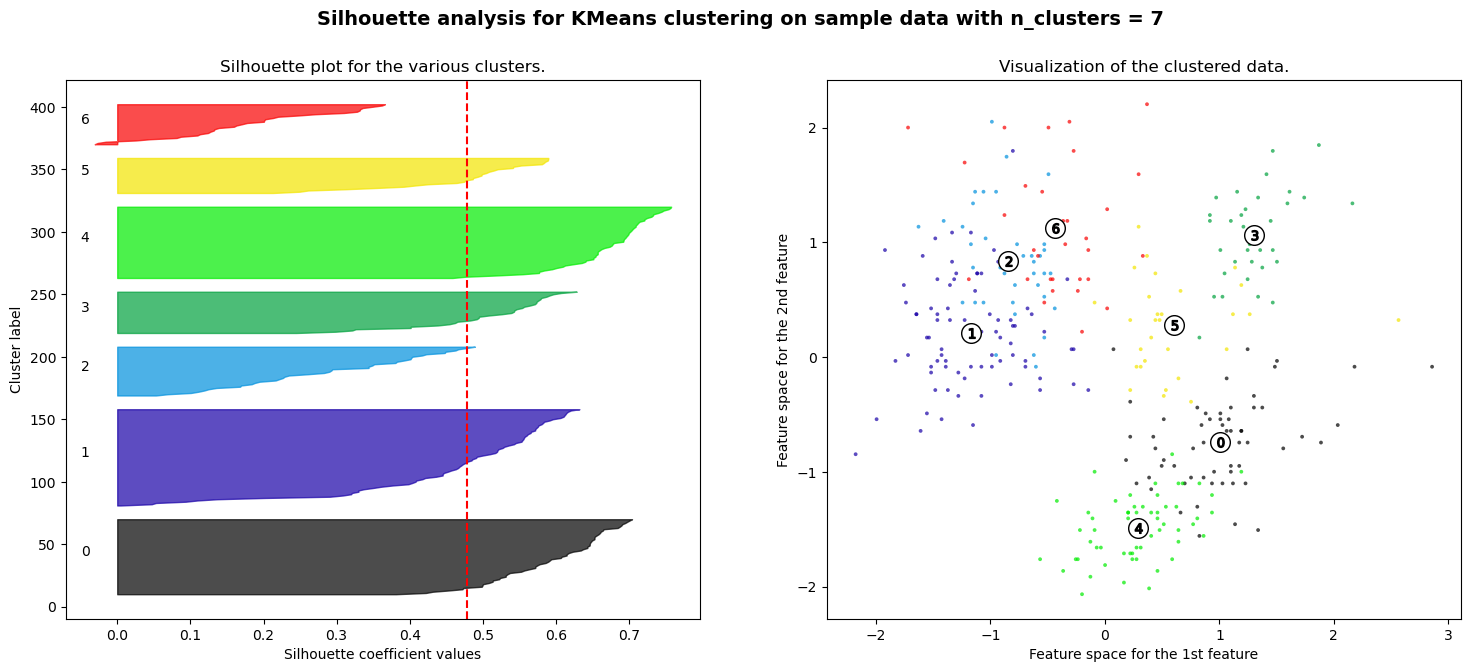

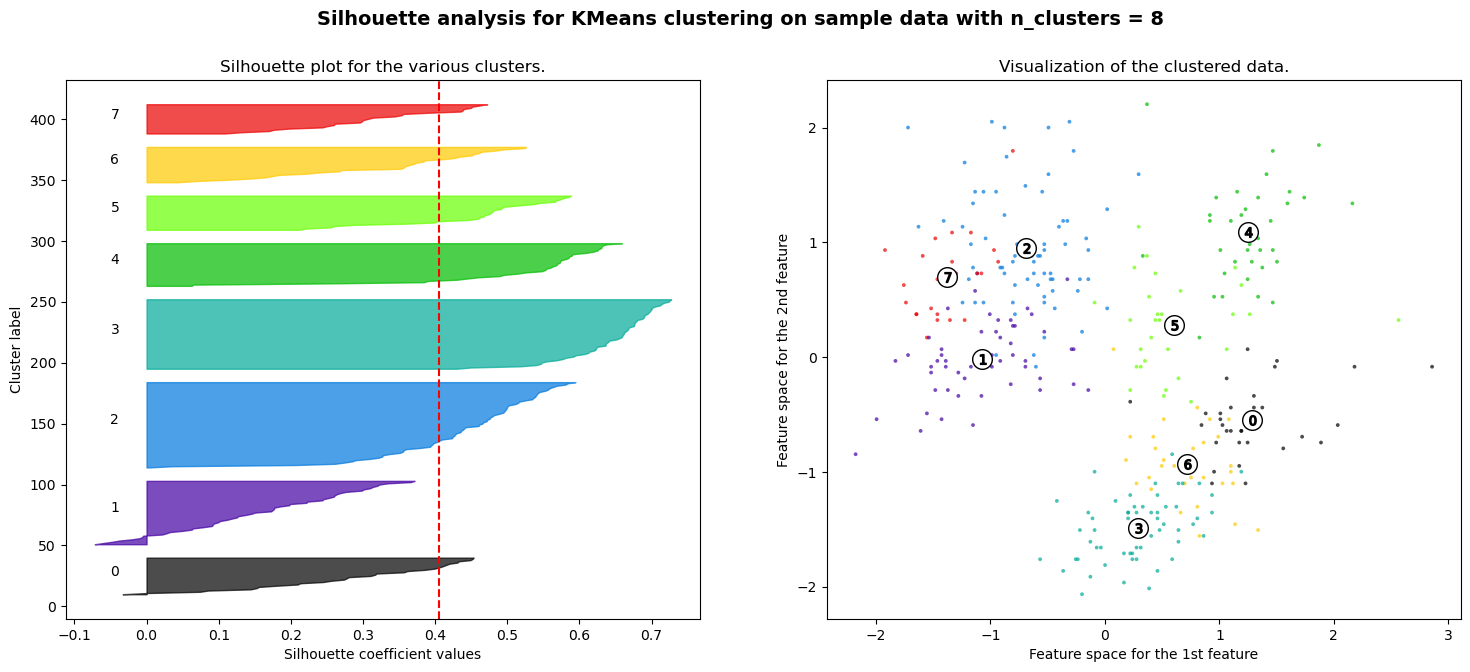

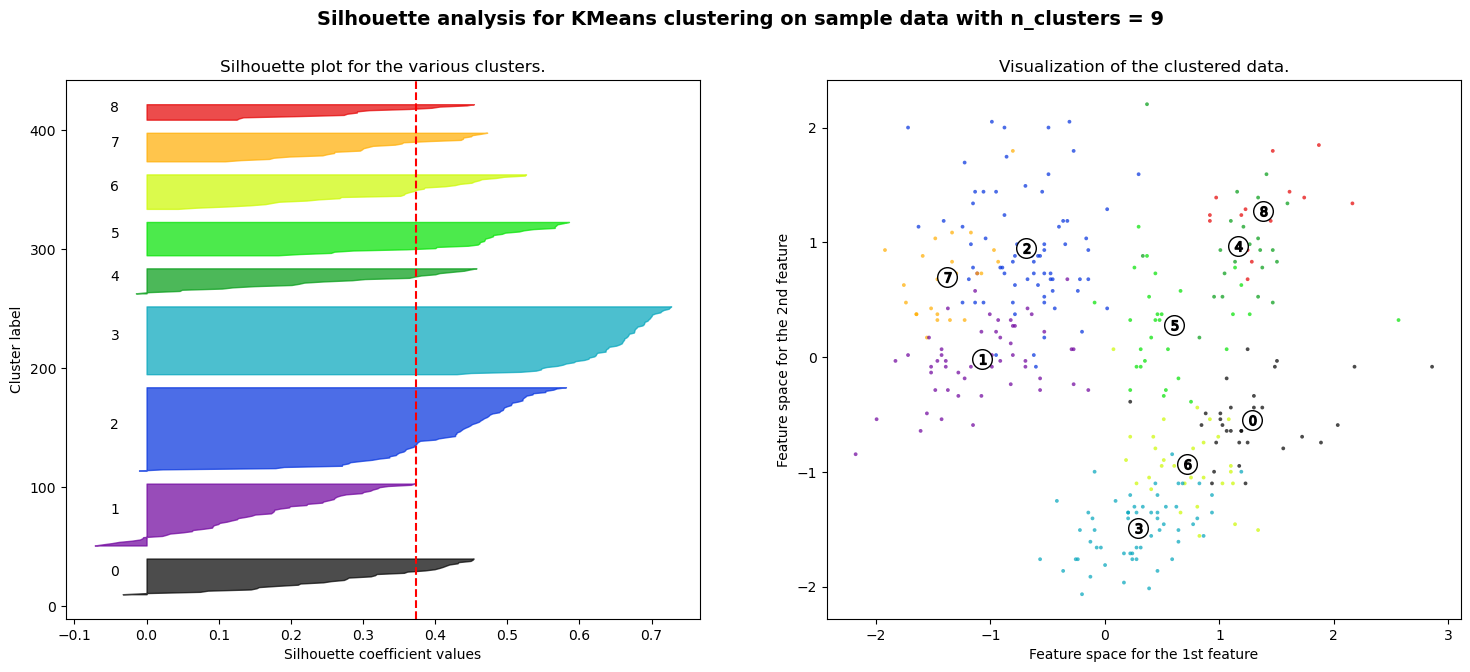

In [219]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

range_n_clusters = [3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "the average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()


In [220]:
# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (333, 5)
Shape of y: (333,)


In [221]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Check the shape of the scaled features
print("Shape of scaled features:", scaled_features.shape)

# Add cluster labels to the original dataframe
data['cluster'] = labels

# Evaluate clustering performance
conf_matrix = confusion_matrix(y, labels)
print("Confusion Matrix:")
print(conf_matrix)

correct_predictions = np.sum(np.diag(conf_matrix))
total_samples = np.sum(conf_matrix)
accuracy = correct_predictions / total_samples
print(f'Cluster Accuracy: {accuracy * 100:.2f}%')

Shape of scaled features: (333, 5)
Confusion Matrix:
[[  0  73  73]
 [  0  34  34]
 [119   0   0]]
Cluster Accuracy: 10.21%


In [222]:
from sklearn.model_selection import GridSearchCV

# Define the model using KMeans
model = KMeans()

# Create a dictionary of all values we want to test for n_clusters, init, max_iter, and tol
param_grid = {
  'n_clusters': [2, 3, 4, 5, 6],
  'init': ['k-means++', 'random'],
  'max_iter': [300, 500, 700],
  'tol': [1e-4, 1e-3, 1e-2],
  'random_state': [42]
}

# Use Grid Search to test all values for the hyperparameters
grid_search = GridSearchCV(model, param_grid, verbose=1, cv=3)
# Fit Grid Search to the data
grid_search.fit(scaled_features)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
#print("Best clustering score: ", grid_search.best_score_)

# Use the best parameters to fit the model
best_kmeans = KMeans(**grid_search.best_params_)
best_kmeans.fit(scaled_features)

# Evaluate the best model
labels = best_kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Best Silhouette Score: {silhouette_avg:.2f}")

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters found:  {'init': 'random', 'max_iter': 300, 'n_clusters': 6, 'random_state': 42, 'tol': 0.01}
Best Silhouette Score: 0.53


# Train, test split

# preparing our data for modelling

In [223]:
#x_train =data_train.drop(columns=['year','species','island']).values

In [224]:
#x_train.shape

In [225]:
#y_train= data_train["species"].values

# Baseline model:
base line simplest model you create that randomly guessing the species of penguin or guessing every data point.

model accuracy can 0.33 as we have 3 differnt classes

# 3. CLASSIFICATION:
Classifications using knn and Random forest

In [226]:
data.drop(columns='Distance_to_Center')
data.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  sex  year  cluster  Distance_to_Center  
0       3750.0    1  2007        2                   2  
1       3800.0    0  2007        1                   1  
2       3250.0    0  2007        1                   1  
4       3450.0    0  2007        1                   1  
5       3650.0    1  2007        2                   2

In [227]:
# Features and labels
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
y =data['species']
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

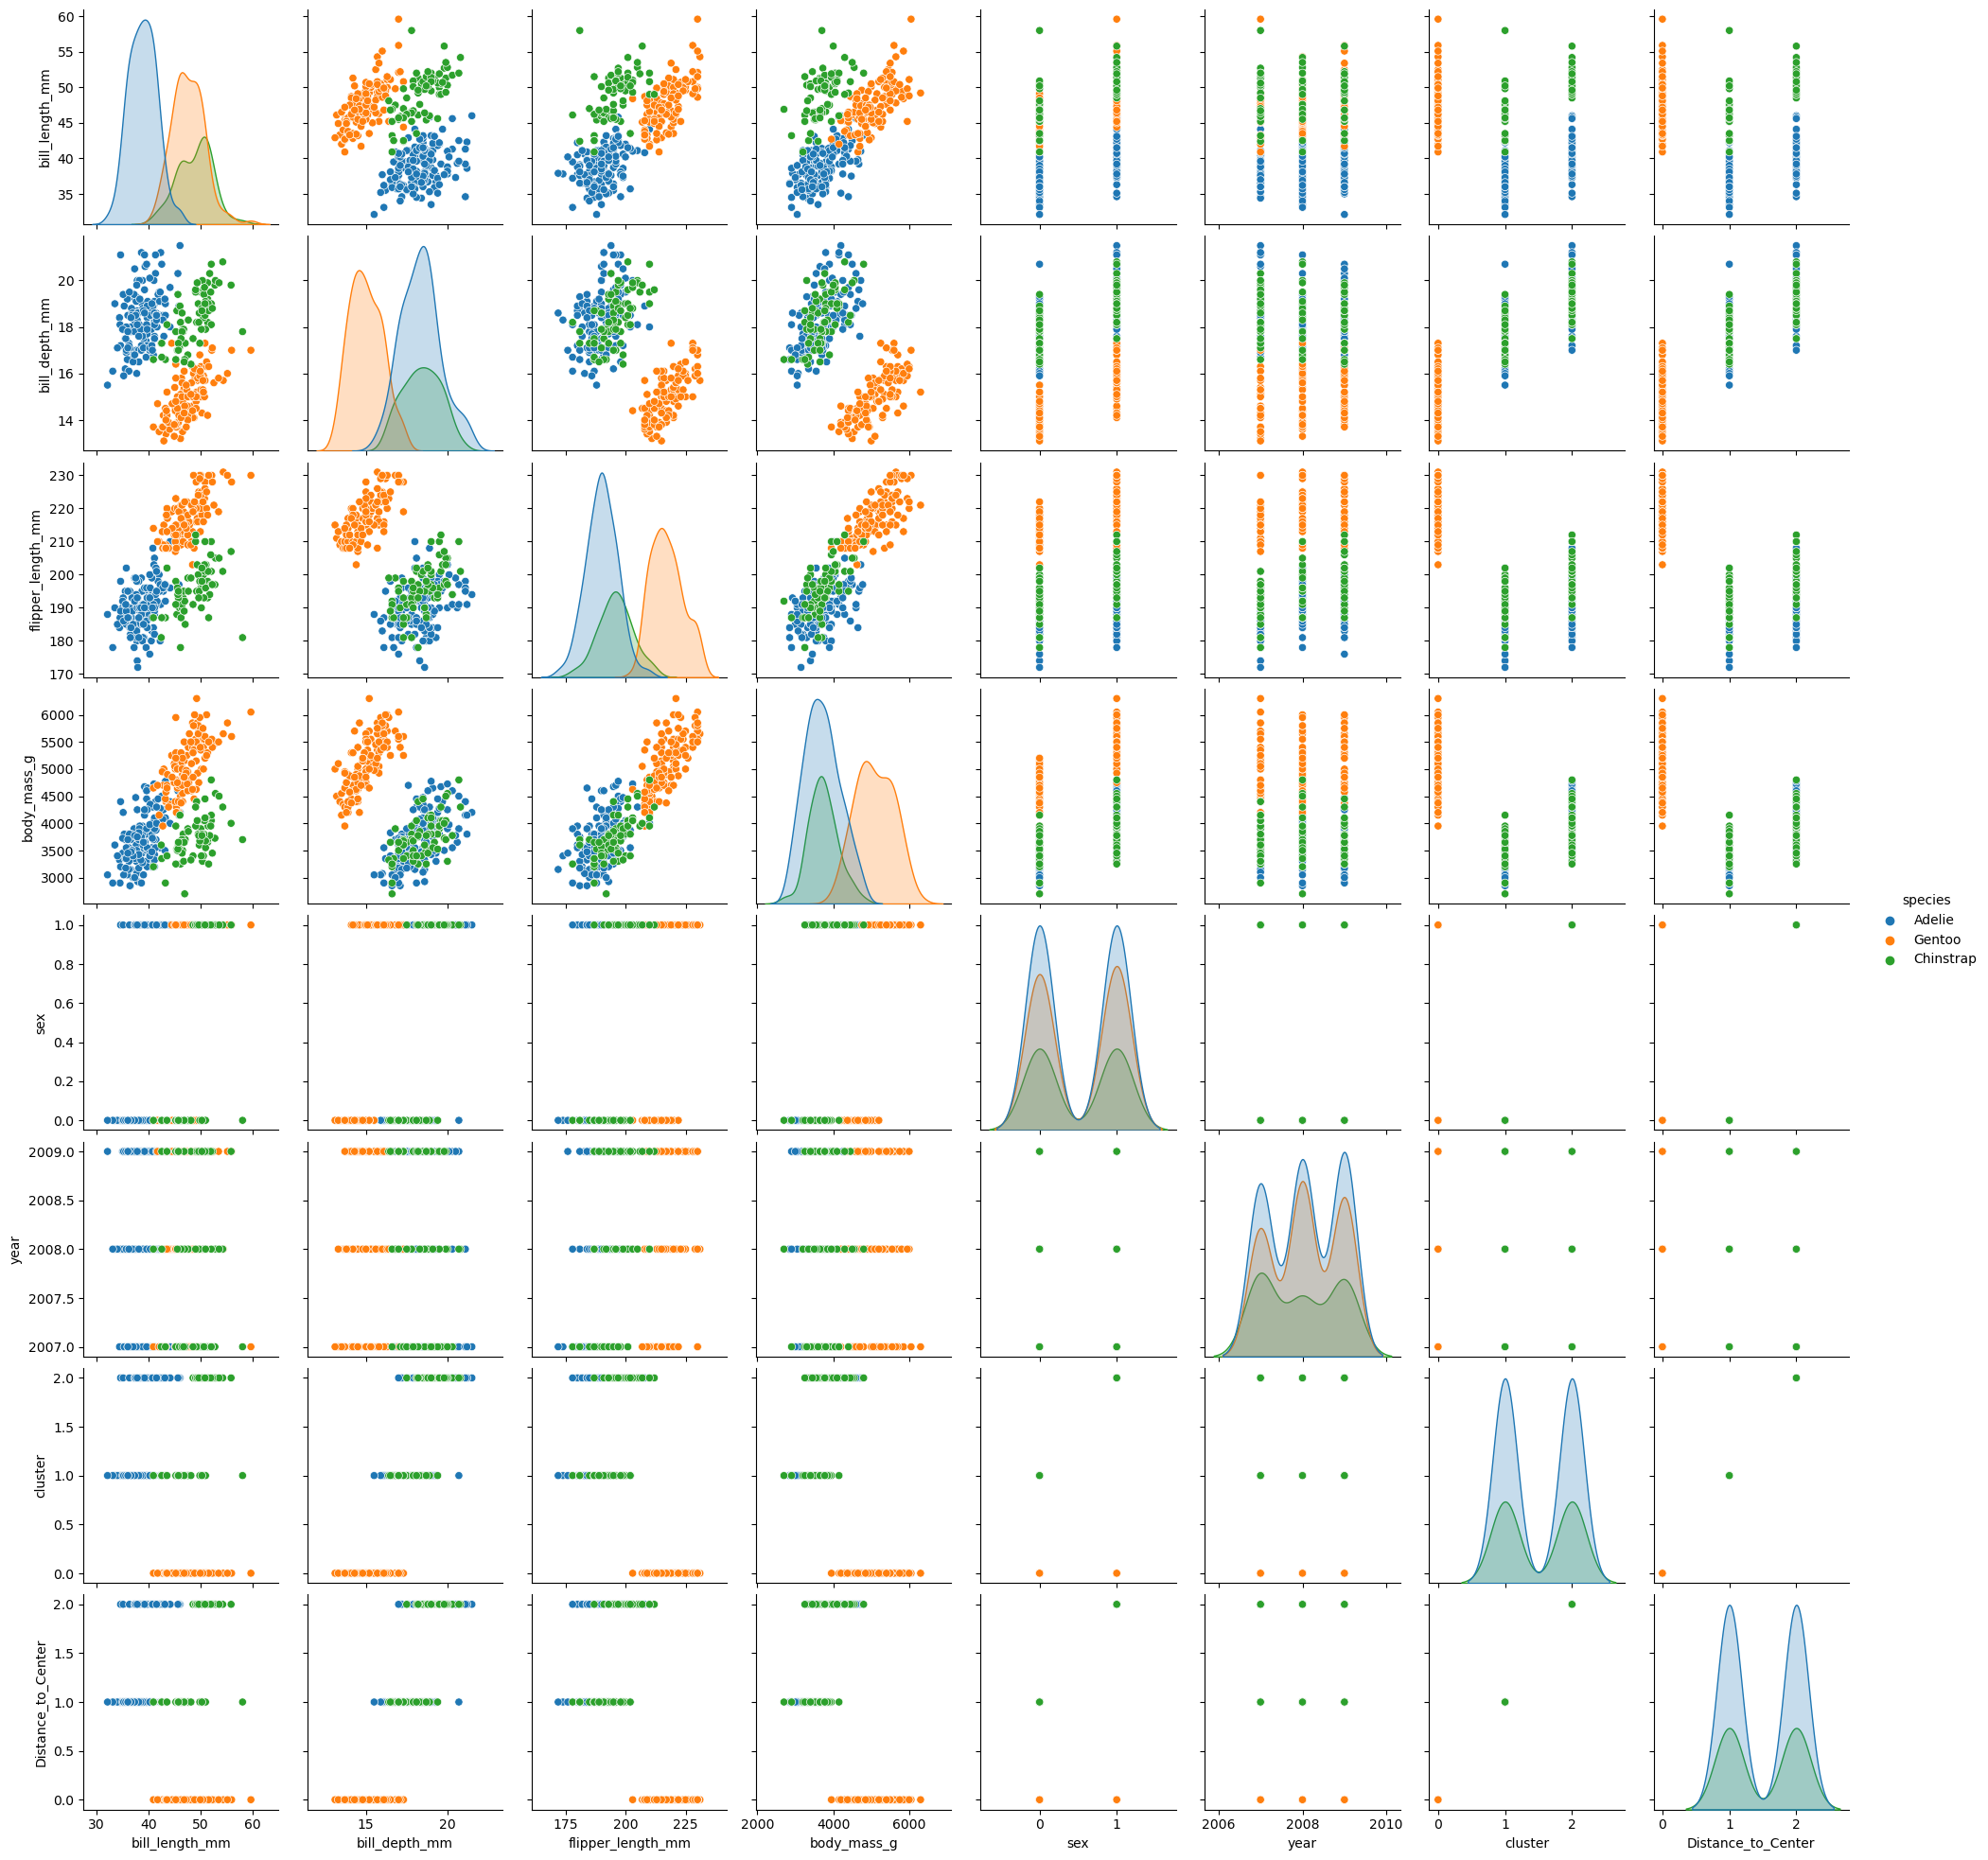

In [229]:
# Pair plot
sns.pairplot(data, hue='species')
plt.show()

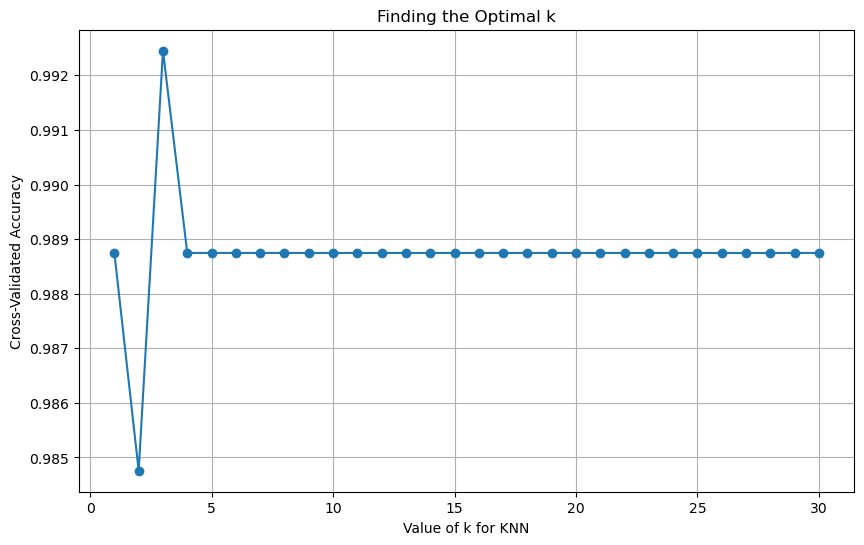

The optimal value of k is: 3


In [230]:
from sklearn.model_selection import cross_val_score

# Define the range of k values to test
k_range = range(1, 31)
k_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal k')
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"The optimal value of k is: {optimal_k}")

In [231]:
# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31), 
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 3}
Best cross-validation accuracy: 0.9924501424501425


In [232]:
penguins=data.copy()

# Label encode categorical features
label_encoders = {}
for column in ['species', 'island', 'sex']:
    le = LabelEncoder()
    penguins[column] = le.fit_transform(penguins[column])
    label_encoders[column] = le

# Data Preprocessing
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island', 'sex']]
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Initial accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Initial Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Initial Classification Report:")
print(classification_report(y_test, y_pred))

# Find optimal k using cross-validation
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"The optimal value of k is: {optimal_k}")

# Retrain with optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
class_report_optimal = classification_report(y_test, y_pred_optimal)
print(f"Optimal accuracy: {accuracy_optimal * 100:.2f}%")
print("Optimal Confusion Matrix:")
print(conf_matrix_optimal)
print("Optimal Classification Report:")
print(class_report_optimal)

# Validate with New Data
X_new = np.array([[45.0, 17.0, 210.0, 4500.0, 1, 1]])
X_new = scaler.transform(X_new)
predicted_species = knn_optimal.predict(X_new)
species = label_encoders['species'].inverse_transform(predicted_species)
print(f"Predicted species for new data: {species[0]}")

# Perform cross-validation with optimal k
cv_scores = cross_val_score(knn_optimal, X, y, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Feature Analysis (train without bill_length_mm)
X_reduced = X.drop(columns=['bill_length_mm'])
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42)
X_train_reduced = scaler.fit_transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
knn_reduced = KNeighborsClassifier(n_neighbors=optimal_k)
knn_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = knn_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
class_report_reduced = classification_report(y_test, y_pred_reduced)
print(f"Accuracy without bill_length_mm: {accuracy_reduced * 100:.2f}%")
print("Confusion Matrix without bill_length_mm:")
print(conf_matrix_reduced)
print("Classification Report without bill_length_mm:")
print(class_report_reduced)


Initial accuracy: 98.81%
Initial Confusion Matrix:
[[40  0  0]
 [ 1 19  0]
 [ 0  0 24]]
Initial Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        24

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

The optimal value of k is: 3
Optimal accuracy: 97.62%
Optimal Confusion Matrix:
[[40  0  0]
 [ 2 18  0]
 [ 0  0 24]]
Optimal Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        24

    accuracy                           0.98        84
   macro avg       0.98      0.97      0.97        84
weighted avg       0.98   

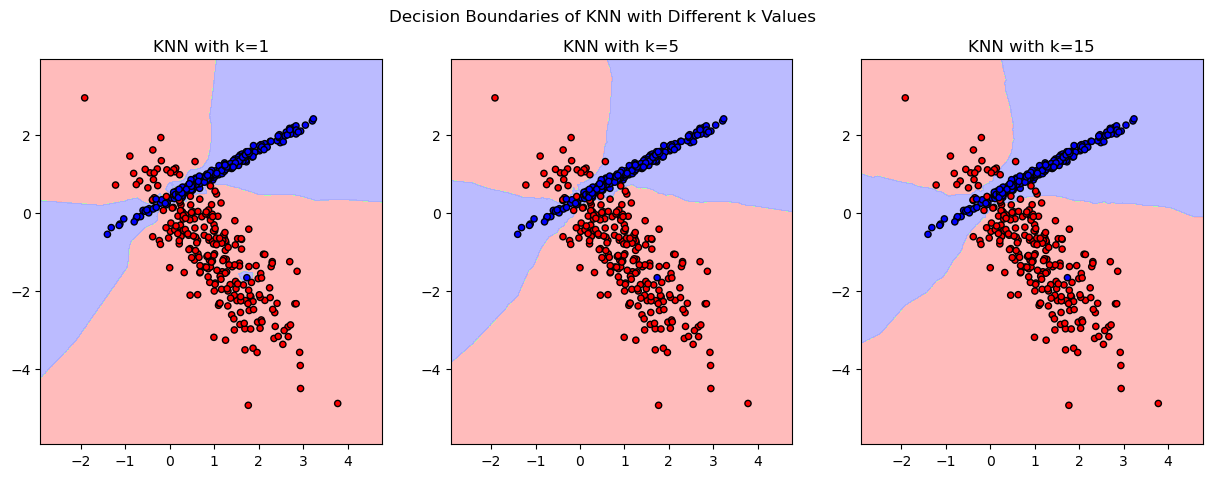

In [233]:
from matplotlib.colors import ListedColormap
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundaries for different values of k
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
k_values = [1, 5, 15]

for idx, k in enumerate(k_values):
    # Create KNN classifier and fit the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Predict on mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    axarr[idx].contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    axarr[idx].set_title(f'KNN with k={k}')
    axarr[idx].set_xlim(xx.min(), xx.max())
    axarr[idx].set_ylim(yy.min(), yy.max())

plt.suptitle("Decision Boundaries of KNN with Different k Values")
plt.show()

In [234]:
y_pred

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0])

In [235]:
X_test.shape

(84, 6)

# Comparision:

In [236]:
print(np.unique(y_test))

[0 1 2]


In [237]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

In [238]:
print("Unique classes in y:", np.unique(y))

Unique classes in y: [0 1]


K-Nearest Neighbors Classifier:
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.94      0.96      0.95        49

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix:
[[48  3]
 [ 2 47]]
Random Forest Classifier:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.94      0.98      0.96        49

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
[[48  3]
 [ 1 48]]


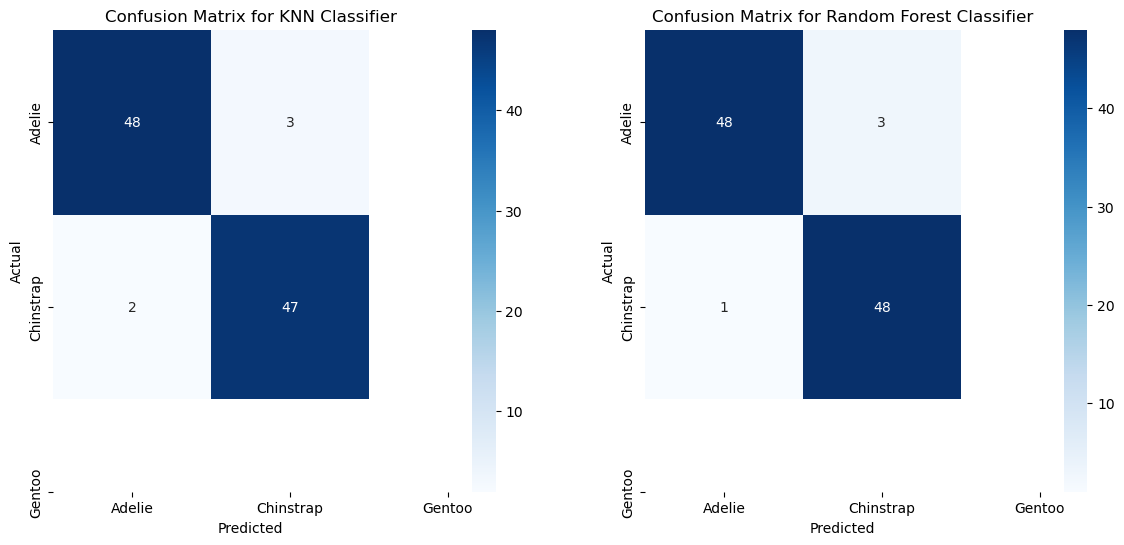

Comparison:
KNN Accuracy: 0.95
Random Forest Accuracy: 0.96


In [239]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Model Training and Predictions
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Evaluate the Models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print('K-Nearest Neighbors Classifier:')
print(f'Accuracy: {accuracy_knn}')
print('Classification Report:')
print(classification_rep_knn)
print('Confusion Matrix:')
print(conf_matrix_knn)

print('Random Forest Classifier:')
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_rep_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)

# Plotting the Confusion Matrices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


# Compare the models
print('Comparison:')
print(f'KNN Accuracy: {accuracy_knn}')
print(f'Random Forest Accuracy: {accuracy_rf}')

# Baseline Model:

In [240]:
# Implement the baseline model
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

# Predict using the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_confusion_matrix = confusion_matrix(y_test, y_pred_baseline)
baseline_classification_report = classification_report(y_test, y_pred_baseline)

print("Baseline Model Accuracy:", baseline_accuracy)
print("Baseline Model Confusion Matrix:\n", baseline_confusion_matrix)
print("Baseline Model Classification Report:\n", baseline_classification_report)

Baseline Model Accuracy: 0.49
Baseline Model Confusion Matrix:
 [[ 0 51]
 [ 0 49]]
Baseline Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.49      1.00      0.66        49

    accuracy                           0.49       100
   macro avg       0.24      0.50      0.33       100
weighted avg       0.24      0.49      0.32       100



In [241]:
## using logistic regression::

In [242]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the logistic regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Predict using the logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the logistic regression model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Model Confusion Matrix:\n", logistic_confusion_matrix)
print("Logistic Regression Model Classification Report:\n", logistic_classification_report)


Logistic Regression Model Accuracy: 0.88
Logistic Regression Model Confusion Matrix:
 [[45  6]
 [ 6 43]]
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.88      0.88      0.88        49

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



#  I build a basic webpage using streamlit. It predicts the type of penguin, if we enter the physical measurements. The project is in my github repo:: https://github.com/SudhaMsr/AI-Analytics 